 <h1><center>AdEase Time Series</center></h1>

### About AdEase:
Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

### Problem Statement

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn.metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',100)

In [3]:
pd.options.display.max_colwidth = 100

In [4]:
adease = pd.read_csv("train_1.csv")

In [5]:
adease2 = pd.read_csv("train_1.csv")

In [6]:
adease2.shape

(145063, 551)

In [7]:
adease.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,13.0,4.0,15.0,25.0,...,13.0,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,80.0,60.0,69.0,42.0,...,12.0,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,5.0,1.0,6.0,2.0,...,6.0,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,22.0,14.0,47.0,25.0,...,38.0,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [8]:
adease.loc[adease['Page'].str.contains('spider')]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,13.0,4.0,15.0,25.0,...,13.0,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,80.0,60.0,69.0,42.0,...,12.0,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,5.0,1.0,6.0,2.0,...,6.0,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,22.0,14.0,47.0,25.0,...,38.0,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [9]:
import re
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

In [10]:
adease['Language']=adease['Page'].map(get_language)

In [11]:
adease

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Language
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,13.0,4.0,15.0,25.0,...,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0,zh
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,80.0,60.0,69.0,42.0,...,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0,zh
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,5.0,1.0,6.0,2.0,...,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0,zh
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,22.0,14.0,47.0,25.0,...,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0,zh
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145

In [12]:
def get_name(page):
    res = re.search('(.*)_([a-z][a-z].wikipedia.org)',page)
    if res:
        return res.groups(0)[0]
    return 'na'

In [13]:
adease['Specific_Name']=adease['Page'].map(get_name)

In [14]:
adease['Specific_Name']

0                                                          2NE1
1                                                           2PM
2                                                            3C
3                                                       4minute
4                                              52_Hz_I_Love_You
                                  ...                          
145058                          Underworld_(serie_de_películas)
145059                            Resident_Evil:_Capítulo_Final
145060                                    Enamorándome_de_Ramón
145061                                   Hasta_el_último_hombre
145062    Francisco_el_matemático_(serie_de_televisión_de_2017)
Name: Specific_Name, Length: 145063, dtype: object

In [15]:
def get_type(page):
    res = re.search('(.*)_([a-z][a-z].wikipedia.org)_(.*)_(.*)',page)
    if res:
        return res.groups(0)[2]
    return 'na'

In [16]:
adease['Access_Type']=adease['Page'].map(get_type)

In [17]:
def get_Origin(page):
    res = re.search('(.*)_([a-z][a-z].wikipedia.org)_(.*)_(.*)',page)
    if res:
        return res.groups(0)[3]
    return 'na'

In [18]:
adease['Access_Origin']=adease['Page'].map(get_Origin)

In [245]:
adease.head(5)

,Language,Specific_Name,Access_Type,Access_Origin,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,zh,2NE1,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,...,13.0,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,zh,2PM,all-access,spider,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,...,12.0,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,zh,3C,all-access,spider,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,...,6.0,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,zh,4minute,all-access,spider,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,...,38.0,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5,zh,5566,all-access,spider,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,12.0,11.0,7.0,9.0,6.0,10.0,8.0,13.0,3.0,14.0,4.0,9.0,14.0,10.0,8.0,3.0,74.0,17.0,8.0,6.0,9.0,3.0,10.0,21.0,9.0,5.0,3.0,4.0,1.0,7.0,3.0,15.0,5.0,6.0,9.0,...,22.0,21.0,18.0,30.0,20.0,12.0,17.0,12.0,122.0,31.0,16.0,15.0,16.0,23.0,30.0,12.0,6.0,17.0,17.0,18.0,15.0,19.0,35.0,16.0,25.0,13.0,19.0,15.0,25.0,135.0,22.0,18.0,12.0,21.0,16.0,52.0,24.0,15.0,28.0,17.0,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


In [24]:
cols=adease.columns.to_list()

In [25]:
adease_1= adease.loc[:,cols[551:555]]
adease_2= adease.loc[:,cols[0:551]]

In [26]:
adease_2

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,13.0,4.0,15.0,25.0,...,13.0,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,80.0,60.0,69.0,42.0,...,12.0,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,5.0,1.0,6.0,2.0,...,6.0,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,22.0,14.0,47.0,25.0,...,38.0,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [27]:
adease = pd.concat([adease_1, adease_2],axis=1)

In [28]:
adease

,Language,Specific_Name,Access_Type,Access_Origin,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,zh,2NE1,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,...,13.0,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,zh,2PM,all-access,spider,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,...,12.0,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,zh,3C,all-access,spider,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,...,6.0,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,zh,4minute,all-access,spider,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,...,38.0,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,zh,52_Hz_I_Love_You,all-access,spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [30]:
adease['Language'].unique()

array(['zh', 'fr', 'en', 'na', 'ru', 'de', 'ja', 'es'], dtype=object)

In [31]:
cols = ['Access_Origin', 'Access_Type', 'Language']
print('Unique Values in Categorical Columns')
print('-'*50)
for col in cols:
    print(col+':')
    print(adease[col].unique())

Unique Values in Categorical Columns
--------------------------------------------------
Access_Origin:
['spider' 'all-agents' 'na']
Access_Type:
['all-access' 'desktop' 'na' 'mobile-web']
Language:
['zh' 'fr' 'en' 'na' 'ru' 'de' 'ja' 'es']


In [32]:
cols = ['Access_Origin', 'Access_Type', 'Language']
print('Value Counts in Categorical Columns')
print('-'*50)
for col in cols:
    print(col+':')
    print(adease[col].value_counts())

Value Counts in Categorical Columns
--------------------------------------------------
Access_Origin:
all-agents    96594
spider        30614
na            17855
Name: Access_Origin, dtype: int64
Access_Type:
all-access    65713
mobile-web    30923
desktop       30572
na            17855
Name: Access_Type, dtype: int64
Language:
en    24108
ja    20431
de    18547
na    17855
fr    17802
zh    17229
ru    15022
es    14069
Name: Language, dtype: int64


In [33]:
### Understanding the rows which have 'na' values 

In [34]:
adease.loc[adease['Language']=='na']

,Language,Specific_Name,Access_Type,Access_Origin,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
13332,na,na,na,na,Accueil_commons.wikimedia.org_all-access_spider,55.0,48.0,44.0,35.0,46.0,41.0,32.0,43.0,40.0,38.0,23.0,17.0,26.0,26.0,35.0,32.0,33.0,24.0,25.0,29.0,32.0,30.0,20.0,27.0,30.0,20.0,30.0,26.0,28.0,19.0,22.0,26.0,28.0,29.0,21.0,31.0,24.0,23.0,18.0,31.0,24.0,30.0,40.0,36.0,35.0,...,62.0,60.0,51.0,42.0,37.0,41.0,42.0,61.0,42.0,45.0,55.0,51.0,47.0,57.0,51.0,46.0,59.0,64.0,74.0,72.0,63.0,61.0,66.0,74.0,130.0,211.0,1155.0,1130.0,596.0,49.0,64.0,580.0,32.0,43.0,62.0,68.0,47.0,26.0,55.0,80.0,69.0,74.0,34.0,62.0,88.0,57.0,74.0,61.0,51.0,60.0
13333,na,na,na,na,Atlas_of_Asia_commons.wikimedia.org_all-access_spider,5.0,3.0,4.0,6.0,3.0,1.0,5.0,6.0,6.0,11.0,3.0,3.0,6.0,5.0,8.0,7.0,1.0,3.0,3.0,4.0,2.0,8.0,5.0,11.0,3.0,1.0,3.0,8.0,4.0,5.0,4.0,1.0,0.0,1.0,5.0,5.0,2.0,4.0,7.0,6.0,8.0,4.0,3.0,8.0,5.0,...,21.0,26.0,20.0,12.0,25.0,24.0,20.0,26.0,21.0,24.0,26.0,26.0,15.0,20.0,19.0,28.0,22.0,25.0,26.0,21.0,21.0,27.0,22.0,23.0,26.0,13.0,16.0,25.0,24.0,25.0,22.0,24.0,19.0,24.0,8.0,18.0,18.0,24.0,25.0,24.0,49.0,43.0,44.0,38.0,31.0,29.0,37.0,32.0,29.0,34.0
13334,na,na,na,na,Atlas_of_Europe_commons.wikimedia.org_all-access_spider,4.0,6.0,9.0,7.0,6.0,4.0,5.0,6.0,13.0,10.0,5.0,2.0,8.0,8.0,14.0,10.0,7.0,5.0,8.0,9.0,4.0,10.0,6.0,5.0,6.0,2.0,3.0,8.0,12.0,5.0,5.0,8.0,7.0,9.0,4.0,3.0,5.0,3.0,10.0,6.0,4.0,9.0,8.0,11.0,6.0,...,23.0,28.0,28.0,12.0,23.0,27.0,27.0,34.0,23.0,31.0,27.0,29.0,17.0,21.0,20.0,34.0,30.0,35.0,33.0,29.0,28.0,32.0,31.0,28.0,30.0,18.0,19.0,27.0,35.0,30.0,26.0,29.0,21.0,30.0,11.0,19.0,29.0,28.0,24.0,26.0,34.0,44.0,47.0,46.0,35.0,31.0,31.0,34.0,28.0,27.0
13335,na,na,na,na,Atlas_of_World_War_II_commons.wikimedia.org_all-access_spider,5.0,2.0,6.0,6.0,8.0,11.0,5.0,5.0,6.0,13.0,8.0,4.0,8.0,8.0,19.0,5.0,7.0,4.0,7.0,6.0,5.0,10.0,8.0,7.0,6.0,9.0,5.0,6.0,13.0,5.0,2.0,5.0,4.0,6.0,3.0,4.0,9.0,6.0,2.0,9.0,1.0,4.0,3.0,7.0,5.0,...,6.0,6.0,5.0,10.0,5.0,8.0,12.0,10.0,13.0,10.0,6.0,9.0,7.0,6.0,3.0,12.0,7.0,5.0,6.0,9.0,8.0,16.0,10.0,11.0,9.0,7.0,14.0,18.0,4.0,12.0,8.0,14.0,11.0,14.0,15.0,27.0,15.0,13.0,10.0,13.0,12.0,18.0,13.0,11.0,8.0,8.0,13.0,5.0,11.0,6.0
13336,na,na,na,na,Atlas_of_colonialism_commons.wikimedia.org_all-access_spider,8.0,6.0,15.0,5.0,5.0,9.0,10.0,3.0,9.0,6.0,10.0,5.0,8.0,7.0,17.0,8.0,8.0,10.0,8.0,8.0,8.0,5.0,3.0,6.0,5.0,1.0,7.0,7.0,9.0,3.0,4.0,6.0,11.0,2.0,3.0,5.0,5.0,5.0,4.0,4.0,5.0,3.0,6.0,8.0,4.0,...,20.0,22.0,23.0,6.0,28.0,22.0,26.0,23.0,28.0,28.0,24.0,28.0,10.0,18.0,32.0,24.0,27.0,27.0,24.0,23.0,28.0,33.0,25.0,26.0,23.0,18.0,23.0,21.0,26.0,29.0,28.0,23.0,24.0,26.0,20.0,19.0,35.0,43.0,36.0,35.0,46.0,32.0,40.0,38.0,29.0,19.0,30.0,29.0,26.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [35]:
indices= adease.loc[adease['Language']=='na'].index

In [36]:
adease.iloc[indices]['Page']

13332                  Accueil_commons.wikimedia.org_all-access_spider
13333            Atlas_of_Asia_commons.wikimedia.org_all-access_spider
13334          Atlas_of_Europe_commons.wikimedia.org_all-access_spider
13335    Atlas_of_World_War_II_commons.wikimedia.org_all-access_spider
13336     Atlas_of_colonialism_commons.wikimedia.org_all-access_spider
                                     ...                              
84730                help:contents_www.mediawiki.org_all-access_spider
84731            how_to_contribute_www.mediawiki.org_all-access_spider
84732                    mediawiki_www.mediawiki.org_all-access_spider
84733                 special:book_www.mediawiki.org_all-access_spider
84734            special:translate_www.mediawiki.org_all-access_spider
Name: Page, Length: 17855, dtype: object

It appears like the rows which has na values in language and other 3 derived columns dont have the 2 character Language code,
indicating these rows would not be useful for language based Time series analysis, Hence we can drop these rows. 

In [37]:
adease.drop(indices, axis=0, inplace=True)

In [38]:
cols = ['Access_Origin', 'Access_Type', 'Language']
print('Unique Values in Categorical Columns')
print('-'*50)
for col in cols:
    print(col+':')
    print(adease[col].unique())

Unique Values in Categorical Columns
--------------------------------------------------
Access_Origin:
['spider' 'all-agents']
Access_Type:
['all-access' 'desktop' 'mobile-web']
Language:
['zh' 'fr' 'en' 'ru' 'de' 'ja' 'es']


In [39]:
cols = ['Access_Origin', 'Access_Type', 'Language']
print('Value Counts in Categorical Columns')
print('-'*50)
for col in cols:
    print(col+':')
    print(adease[col].value_counts())

Value Counts in Categorical Columns
--------------------------------------------------
Access_Origin:
all-agents    96594
spider        30614
Name: Access_Origin, dtype: int64
Access_Type:
all-access    65713
mobile-web    30923
desktop       30572
Name: Access_Type, dtype: int64
Language:
en    24108
ja    20431
de    18547
fr    17802
zh    17229
ru    15022
es    14069
Name: Language, dtype: int64


In [40]:
adease

,Language,Specific_Name,Access_Type,Access_Origin,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,zh,2NE1,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,10.0,5.0,9.0,9.0,9.0,9.0,...,13.0,8.0,15.0,14.0,12.0,6.0,11.0,10.0,42.0,21.0,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,zh,2PM,all-access,spider,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,12.0,27.0,27.0,36.0,23.0,58.0,...,12.0,11.0,14.0,28.0,23.0,20.0,9.0,12.0,11.0,14.0,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,zh,3C,all-access,spider,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,4.0,5.0,0.0,0.0,7.0,3.0,...,6.0,4.0,2.0,4.0,6.0,5.0,4.0,4.0,3.0,3.0,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,zh,4minute,all-access,spider,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,8.0,27.0,19.0,16.0,2.0,84.0,...,38.0,13.0,14.0,17.0,26.0,14.0,10.0,9.0,23.0,15.0,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,zh,52_Hz_I_Love_You,all-access,spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,11.0,8.0,6.0,10.0,14.0,6.0,9.0,6.0,16.0,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [41]:
adease.dropna(thresh=300, inplace=True)

In [42]:
## As we will be taking sum of values per language as we would primarily be analysing language, imputing null values with zero
adease = adease.fillna(0.0)

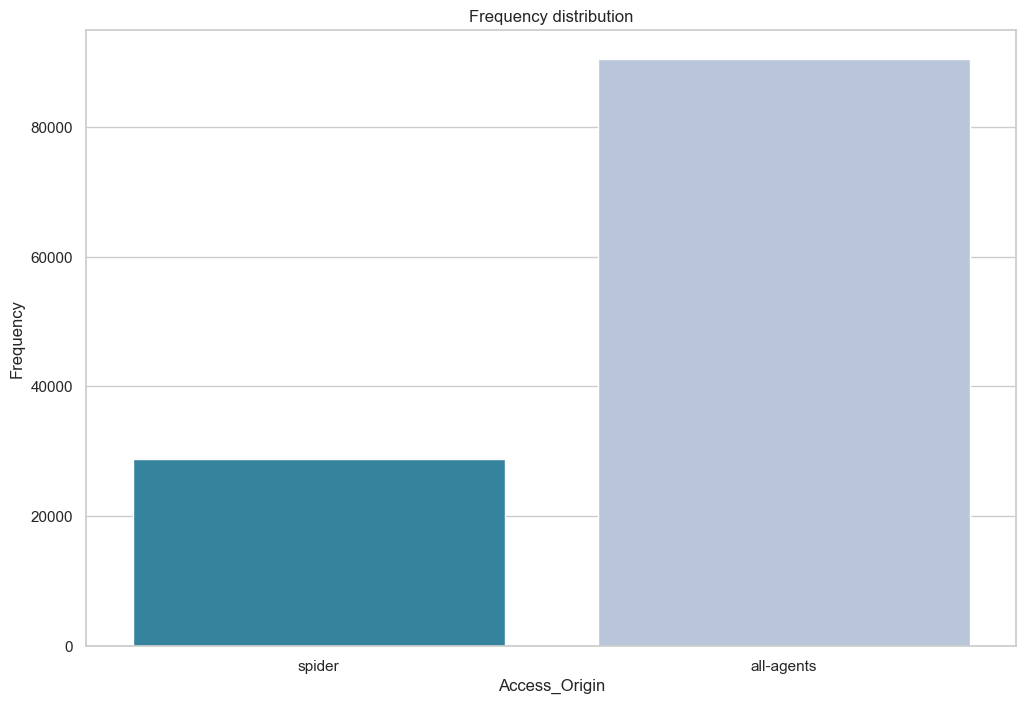

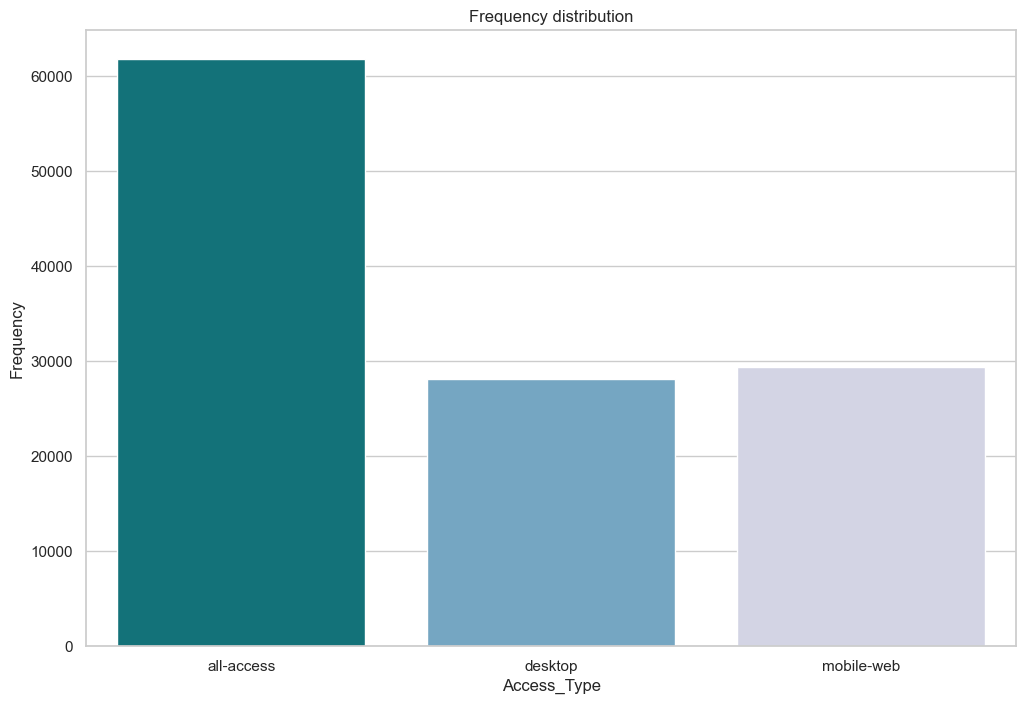

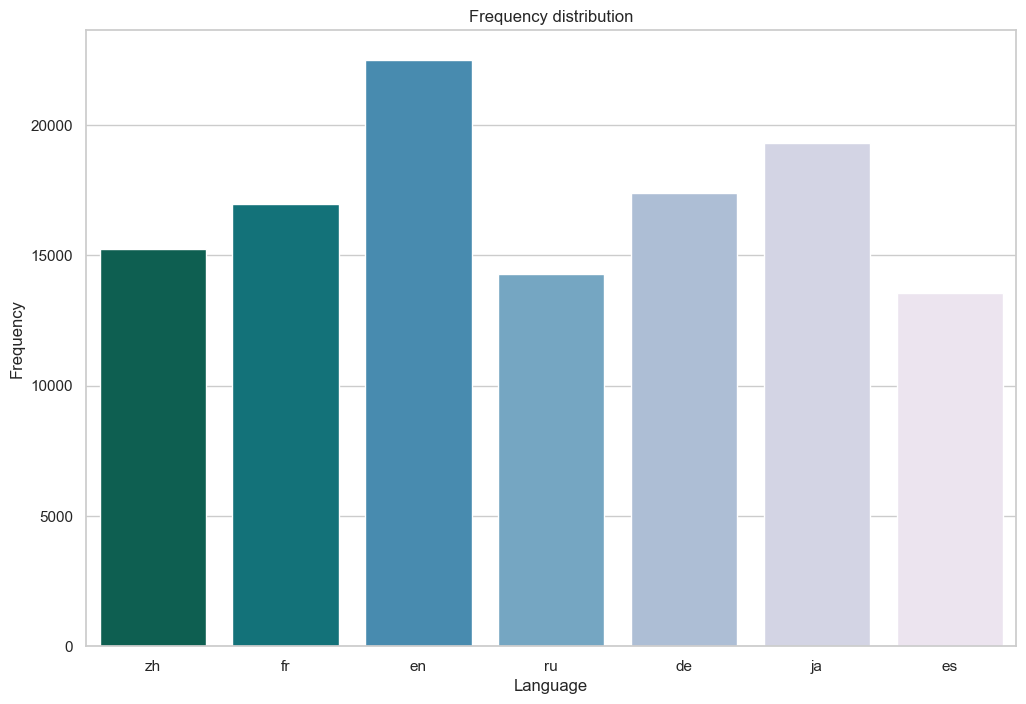

In [43]:
sns.set(style="whitegrid", color_codes=True)
def countplot(col):
    plt.figure(figsize=(12,8))
    ax = sns.countplot(x=col, data=adease,palette="PuBuGn_r")
    plt.ylabel('Frequency')
    plt.title('Frequency distribution')
    plt.show()

cols = ['Access_Origin', 'Access_Type', 'Language']
for col in cols:
    countplot(col)

In [44]:
## Group data per Language

In [45]:
adease_lang_sum = adease.groupby('Language').mean().reset_index()
adease_lang_sum

,Language,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,de,762.799356,752.409457,722.159342,662.697595,770.382478,848.006098,822.380465,834.398010,803.311608,748.645018,692.579038,821.632651,896.516912,853.217326,796.355557,788.739013,811.787506,955.162563,901.765359,826.335596,770.629659,786.207087,763.748850,724.314830,720.003854,752.549816,805.691728,799.278935,797.234238,762.020881,713.733951,699.022837,723.083583,751.876956,796.337724,762.521514,767.931201,783.493845,708.367867,790.199494,755.200587,781.986827,787.062184,802.356765,764.411068,721.986367,865.272952,849.951392,833.905430,...,921.280258,1042.921997,1057.861194,968.148470,993.976703,953.889841,901.846871,906.602911,1003.394443,959.521629,941.783134,885.976760,921.445122,854.503451,863.078751,1034.333295,1039.061033,964.762310,878.922342,870.322538,865.129890,816.813507,963.048378,941.893580,890.347676,892.017890,970.660607,930.673205,793.833410,949.669754,948.993327,897.447193,953.898642,879.787678,822.061321,776.563046,903.925736,1109.663829,894.751553,894.729579,861.724632,871.817073,849.824551,1311.077773,1259.730729,1118.556259,1064.850380,1033.478141,980.874367,936.890704
1,en,3762.977701,3750.821962,3561.108609,3707.496180,3829.005819,4122.662447,3901.830357,3681.598081,3766.828758,3745.529717,3766.395034,4143.518790,4104.086754,4127.400675,3815.624867,3860.655251,3700.500577,3571.745247,3791.555482,3984.681370,3795.536025,3735.843328,3679.573383,3577.121846,3584.240050,3839.850391,3901.857498,3844.469305,4486.372335,3515.881397,3400.886461,3406.826937,3708.249112,3499.100924,3771.938877,3777.135617,3784.332400,3855.086754,3677.703047,3834.221882,3762.900631,3757.414534,3770.450649,3718.664845,3681.331334,3679.734097,3926.003465,3978.101190,3839.207667,...,5585.568586,6083.377132,6250.355855,5564.842173,5384.845460,5122.804460,4894.109364,4954.572761,5083.112518,5493.155961,5556.499156,5049.460421,4751.257374,4624.317786,5248.947273,5475.689632,5026.886505,5149.659337,4788.832134,4767.261905,4691.036914,5311.226146,5334.421553,5455.207223,5417.717173,5109.364650,5016.218728,4619.836754,4782.280872,5009.054726,5188.846615,4929.979744,5180.053660,4706.739161,4445.869980,4445.858698,5136.975036,5591.920087,5506.084355,5115.853012,5186.577381,4845.884195,5157.562145,5355.615227,6031.336709,6308.638326,6103.466063,6512.116071,5397.059701,5276.218728
2,es,1127.152490,1077.167466,990.603541,930.028624,1011.461011,1152.751531,1123.610771,1090.510291,1069.929989,972.665216,874.767392,996.658724,1130.673847,1187.406123,1122.181262,1068.560752,961.678864,836.725267,894.994541,1051.378089,1041.444338,1071.706308,1005.523571,893.131169,800.303209,882.633272,1016.562818,1009.011656,1020.336260,970.476946,876.781778,765.763630,840.571597,866.303430,1050.857101,1063.500111,1064.343194,945.721136,870.067281,951.344744,1016.914201,1180.448764,1187.377868,1145.393655,978.183106,847.259683,921.657912,1136.616673,1241.992696,...,1136.722759,1329

In [380]:

Avg_view=pd.DataFrame(adease_lang_sum['Language'])
Avg_view['Values']=adease_lang_sum.mean(axis=1)
Avg_view

,Language,Values
0,de,919.113721
1,en,4691.685740
2,es,1262.407216
3,fr,675.716138
4,ja,795.298577
5,ru,1008.223359
6,zh,359.720586


Text(0.5, 1.0, 'Mean views per Language')

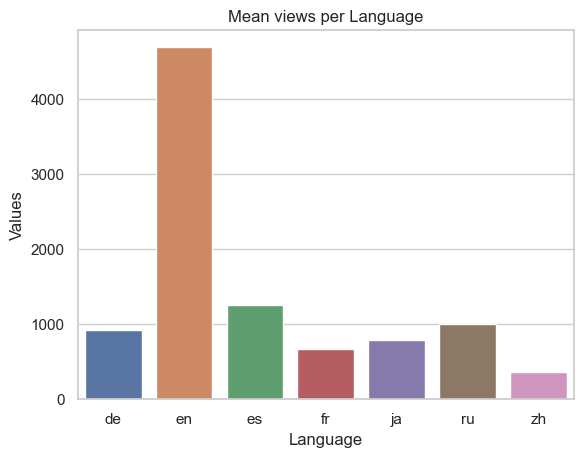

In [381]:
sns.barplot(data=Avg_view,x='Language',y='Values')
plt.title('Mean views per Language')

In [46]:
## Group data per Access_Origin

In [47]:
adease_origin_sum = adease.groupby('Access_Origin').mean().reset_index()
adease_origin_sum

,Access_Origin,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,all-agents,1621.105129,1631.279305,1539.198323,1590.531819,1654.284703,1754.672821,1679.998971,1619.744809,1628.634747,1616.369811,1587.882128,1766.818114,1769.367101,1768.083415,1655.984536,1674.867482,1648.734279,1588.939305,1659.173069,1716.615809,1635.002146,1625.797794,1567.476323,1485.139022,1459.794642,1569.324414,1615.967844,1591.031614,1760.968519,1487.243974,1419.726204,1382.769764,1499.710839,1496.554904,1647.619979,1635.561928,1646.260744,1645.153833,1569.609150,1655.120660,1627.672577,1655.95999,1674.750893,1666.032753,1631.098371,1607.658684,1715.993241,1749.063527,1717.735695,...,2264.313109,2459.080584,2518.111711,2312.940334,2240.076745,2149.618033,2048.731370,2052.553931,2169.617214,2245.328252,2265.311195,2133.505481,2028.586419,1948.233809,2169.509585,2318.808723,2159.455162,2235.606462,2047.975952,2018.434421,1978.282225,2116.727819,2223.971218,2217.353561,2195.462164,2122.225889,2085.180470,1970.349468,1964.031282,2103.845569,2138.031326,2046.683429,2136.312711,1952.774642,1848.380740,1858.651383,2148.509452,2280.705961,2202.569107,2069.979348,2037.961495,2003.378516,2044.236696,2224.036791,2455.150747,2458.683130,2391.630753,2482.887426,2158.008540,2171.442485
1,spider,21.689941,19.330142,18.520187,19.458481,18.889109,17.717343,19.874298,22.889490,26.143774,23.876864,20.379847,18.593132,24.696913,21.019702,20.302046,25.435969,22.802740,19.626153,36.786750,27.305619,18.449913,20.628685,23.069546,16.679778,17.069997,18.324696,18.270343,19.646306,21.855047,16.232917,15.407596,17.115678,16.270794,15.001041,18.179292,17.318835,17.593895,17.289559,17.999098,18.438536,16.324558,18.36854,20.342733,20.929379,21.850607,20.563545,21.423691,19.556122,19.656712,...,71.484391,65.169199,65.060250,68.440826,77.126708,73.998058,72.229275,73.200867,70.798682,65.259834,64.771870,65.700416,64.962227,72.559938,80.689698,97.548734,67.770864,73.147832,67.388172,79.983073,70.816823,70.538814,73.819806,72.429067,72.087027,70.492022,67.689213,75.069650,73.504162,66.686472,76.282588,66.277177,71.971037,75.760423,81.919771,89.874575,91.748283,88.398647,86.675824,88.312314,91.558550,100.005168,96.070482,106.415574,124.997503,115.747624,93.781963,90.553035,76.520777,82.320846


In [48]:
## Group data per Access_Type

In [49]:
adease_AccessType_sum = adease.groupby('Access_Type').mean().reset_index()
adease_AccessType_sum

,Access_Type,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,2015-08-09,2015-08-10,2015-08-11,2015-08-12,2015-08-13,2015-08-14,2015-08-15,2015-08-16,2015-08-17,2015-08-18,...,2016-11-12,2016-11-13,2016-11-14,2016-11-15,2016-11-16,2016-11-17,2016-11-18,2016-11-19,2016-11-20,2016-11-21,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,all-access,1197.063386,1211.056182,1138.529969,1179.178065,1226.929959,1296.138641,1241.033466,1199.689560,1208.035895,1197.432064,1177.043391,1307.703500,1311.353086,1303.117836,1222.076776,1240.638430,1222.005213,1177.726702,1239.566576,1275.326630,1208.413801,1202.938475,1162.026520,1099.358801,1083.175215,1164.067062,1197.755699,1178.040979,1300.463150,1098.833528,1047.648436,1025.110291,1112.253578,1106.860938,1218.995807,1209.899424,1216.964866,1216.553348,1162.899213,1227.716372,1204.550337,1225.229584,1239.742957,1233.802749,1207.255165,1190.457516,1271.115229,1292.199647,1268.202124,...,1688.082767,1830.259018,1869.181109,1719.657616,1671.951736,1603.197445,1528.805178,1531.923532,1620.308044,1669.282495,1682.268830,1586.092271,1510.043019,1452.438573,1622.057720,1738.086377,1605.073036,1660.719157,1524.949258,1510.752267,1476.091574,1576.614533,1656.787951,1651.608850,1633.025112,1582.255634,1549.448190,1473.148549,1466.510459,1567.121673,1594.132861,1524.223998,1594.126530,1459.793958,1386.365812,1400.985218,1608.297422,1704.205443,1663.707840,1576.667428,1559.179959,1540.474888,1574.780633,1717.140405,1895.554368,1895.752234,1836.026148,1898.025986,1655.488310,1660.214575
1,desktop,1397.141480,1406.564176,1255.652117,1178.875703,1242.271327,1522.451192,1466.331839,1386.164283,1406.065101,1378.359765,1209.593419,1328.685912,1550.842227,1540.387300,1441.971576,1437.382391,1358.918179,1197.690857,1232.934792,1453.895197,1399.992707,1396.734472,1339.560512,1226.934009,1120.858627,1206.260797,1376.789861,1380.574102,1689.614052,1274.355034,1194.208822,1067.988332,1143.594450,1312.294130,1434.469050,1427.029420,1430.270829,1395.730060,1218.480754,1260.975667,1383.175987,1427.731128,1446.420206,1432.612558,1355.829918,1219.534045,1298.638420,1504.851405,1500.664781,...,1877.212700,1998.952437,2363.179580,2202.504945,2129.248879,2030.060441,1881.016329,1742.588438,1748.823479,2122.555674,2239.797688,1990.491889,1816.926965,1690.143863,1774.792138,1889.871220,2003.360619,2139.127286,1931.688367,1907.394913,1827.719886,1921.072679,1886.514230,2117.295411,2107.939523,2002.717360,2002.554714,1816.146425,1670.529811,1754.555141,2024.546389,1943.668730,1968.114657,1821.160014,1691.260619,1503.138954,1735.254002,2157.800711,2165.417645,1945.818997,1925.178477,1694.121060,1605.613767,1639.086446,1927.322163,1991.301565,1968.040021,1973.166951,1715.248951,1609.685486
2,mobile-web,1157.022310,1147.574441,1160.309854,1307.295412,1341.889165,1235.998093,1177.837937,1158.996900,1152.953881,1161.795804,1275.121087,1435.448687,1228.908308,1248.679655,1167.516162,1196.047311,1227.317279,1287.594945,1356.871760,1237.650192,1170.024354,1158.459927,1122.081985,1101.944514,1159.895535,1246.449368,1155.874825,1118.293300,1090.298069,1063.688750,1039.393065,1095.538540,1199.079533,1037.936783,1153.340236,1141.625464,1156.872203,1187.101979,1237.763173,1324.4

In [50]:
### Splitting the data related to each language seperately

In [51]:
adease_lang_final = adease_lang_sum.T
adease_lang_final.columns = adease_lang_final.loc['Language']
adease_lang_final=adease_lang_final[1:]

In [52]:
adease_lang_final

Language,de,en,es,fr,ja,ru,zh
2015-07-01,762.799356,3762.977701,1127.15249,498.533978,614.509767,662.734804,272.051391
2015-07-02,752.409457,3750.821962,1077.167466,501.735369,705.666926,674.204552,272.458979
2015-07-03,722.159342,3561.108609,990.603541,482.466671,637.31955,624.891877,270.652337
2015-07-04,662.697595,3707.49618,930.028624,515.697648,800.731437,587.759944,273.263258
2015-07-05,770.382478,3829.005819,1011.461011,506.304061,768.193067,625.946709,291.498622
...,...,...,...,...,...,...,...
2016-12-27,1118.556259,6308.638326,1070.634231,840.082042,808.416084,997.979762,362.653912
2016-12-28,1064.85038,6103.466063,1108.698045,783.125066,807.305767,944.672549,368.596679
2016-12-29,1033.478141,6512.116071,1058.37654,762.772323,883.610809,909.062185,340.109609
2016-12-30,980.874367,5397.059701,807.336776,710.115283,979.200269,815.214986,342.319506


<AxesSubplot:>

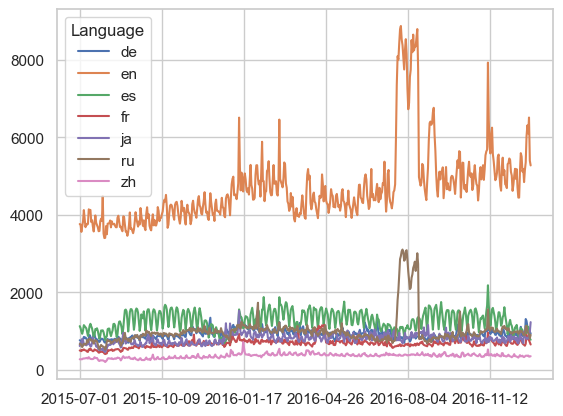

In [110]:
adease_lang_final.plot()

In [53]:
adease_lang_final.columns

Index(['de', 'en', 'es', 'fr', 'ja', 'ru', 'zh'], dtype='object', name='Language')

In [54]:
adease_lang_final['de']

2015-07-01     762.799356
2015-07-02     752.409457
2015-07-03     722.159342
2015-07-04     662.697595
2015-07-05     770.382478
                 ...     
2016-12-27    1118.556259
2016-12-28     1064.85038
2016-12-29    1033.478141
2016-12-30     980.874367
2016-12-31     936.890704
Name: de, Length: 550, dtype: object

In [56]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(adease_lang_final['en'].values, model='additive', period=7)

<Figure size 2000x700 with 0 Axes>

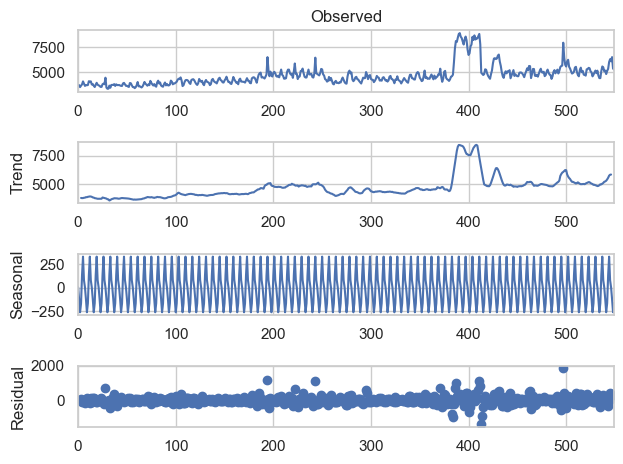

<Figure size 2000x700 with 0 Axes>

In [57]:
fig = result.plot()
plt.figure(figsize=(20, 7))

In [58]:
### Except for few sudden spikes there is no evident seasonality and the same is shown from the decomposition too.

<AxesSubplot:>

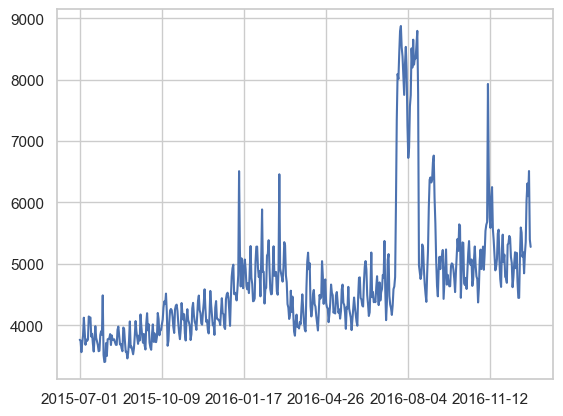

In [59]:
adease_lang_final['en'].plot()

### Check for stationarity

In [61]:
from statsmodels.tsa.stattools import adfuller

**Augmented Dickey–Fuller Test** <br>

The Augmented Dickey-Fuller Test is used to determine if time-series data is stationary or not. Similar to a t-test, we set a significance level before the test and make conclusions on the hypothesis based on the resulting p-value.

Null Hypothesis: The data is not stationary.

Alternative Hypothesis: The data is stationary.

For the data to be stationary (ie. reject the null hypothesis), the ADF test should have:

p-value <= significance level (0.01, 0.05, 0.10, etc.)
If the p-value is greater than the significance level then we can say that it is likely that the data is not stationary.

We can see in the ADF test below that the p-value is 0.991880, meaning that it is very likely that the data is not stationary.

In [65]:
print('Results of Dickey Fuller Test:')
adfuller(adease_lang_final['en'], autolag='AIC')

Results of Dickey Fuller Test:


(-2.3709779463070864,
 0.15009574384194801,
 14,
 535,
 {'1%': -3.4426321555520905,
  '5%': -2.86695748394138,
  '10%': -2.5696553279762426},
 7705.101859213394)

We have close to 15% significance that the data is non stationary hence we will need to carry out difference to check for stationarity.
As we could see strong seasonality with 7 day period let us try differencing and see the stationarity

In [77]:
adease_en = pd.DataFrame(adease_lang_final['en'], index= adease_lang_final.index)
adease_de  = pd.DataFrame(adease_lang_final['de'], index= adease_lang_final.index)
adease_es  = pd.DataFrame(adease_lang_final['es'], index= adease_lang_final.index)
adease_fr  = pd.DataFrame(adease_lang_final['fr'], index= adease_lang_final.index)
adease_ja  = pd.DataFrame(adease_lang_final['ja'], index= adease_lang_final.index)
adease_ru  = pd.DataFrame(adease_lang_final['ru'], index= adease_lang_final.index)
adease_zh  = pd.DataFrame(adease_lang_final['zh'], index= adease_lang_final.index)

### Differencing (Seasonal and first order)

In [175]:
adease_en['Seasonal_diff']=adease_en['en']-adease_en['en'].shift(7)
adease_en['Seasonal_first_diff']=adease_en['Seasonal_diff']-adease_en['Seasonal_diff'].shift(1)
adease_en['Single_diff']=adease_en['en']-adease_en['en'].shift(1)
adease_en.head(15)

,en,Seasonal_diff,Seasonal_first_diff,Single_diff
2015-07-01,3762.977701,NaN,NaN,NaN
2015-07-02,3750.821962,NaN,NaN,-12.155739
2015-07-03,3561.108609,NaN,NaN,-189.713353
2015-07-04,3707.49618,NaN,NaN,146.387571
2015-07-05,3829.005819,NaN,NaN,121.509639
2015-07-06,4122.662447,NaN,NaN,293.656628
2015-07-07,3901.830357,NaN,NaN,-220.83209
2015-07-08,3681.598081,-81.37962,NaN,-220.232276
2015-07-09,3766.828758,16.006796,97.386416,85.230677
2015-07-10,3745.529717,184.421109,168.414312,-21.299041


In [83]:
print('Results of Dickey Fuller Test:')
adfuller(adease_en['Seasonal_diff'].dropna(), autolag='AIC')

Results of Dickey Fuller Test:


(-5.121209969588487,
 1.2705682492031055e-05,
 19,
 523,
 {'1%': -3.4429153652063986,
  '5%': -2.8670821452874007,
  '10%': -2.5697217608736187},
 7637.841505637703)

Differencing with 7 lags (weekly seasonality) makes the data stationary, D=1

<AxesSubplot:>

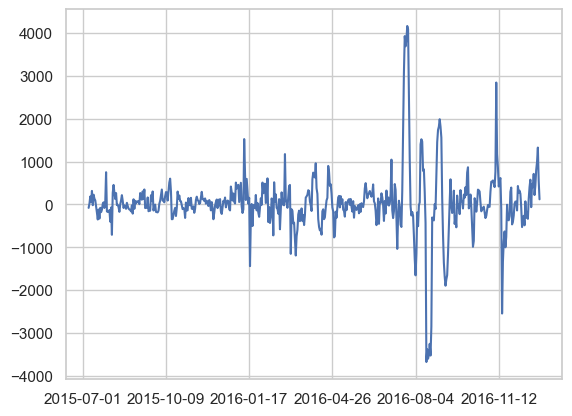

In [101]:
adease_en['Seasonal_diff'].plot()
### By removing the seasonal component the data has become almost stationary

In [177]:
print('Results of Dickey Fuller Test:')
adfuller(adease_en['Single_diff'].dropna(), autolag='AIC')

Results of Dickey Fuller Test:


(-8.27302501838508,
 4.736975105985589e-13,
 13,
 535,
 {'1%': -3.4426321555520905,
  '5%': -2.86695748394138,
  '10%': -2.5696553279762426},
 7695.348938089575)

<AxesSubplot:>

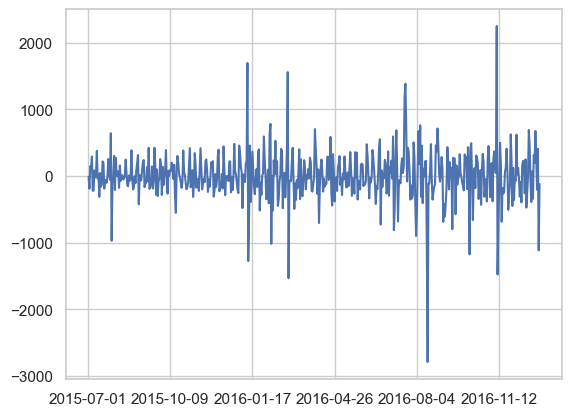

In [176]:
adease_en['Single_diff'].plot()

In [ ]:
Non Seasonal single difference also made the series Stationary (d=1)

In [70]:
langs = ['de', 'en', 'es', 'fr', 'ja', 'ru', 'zh']
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

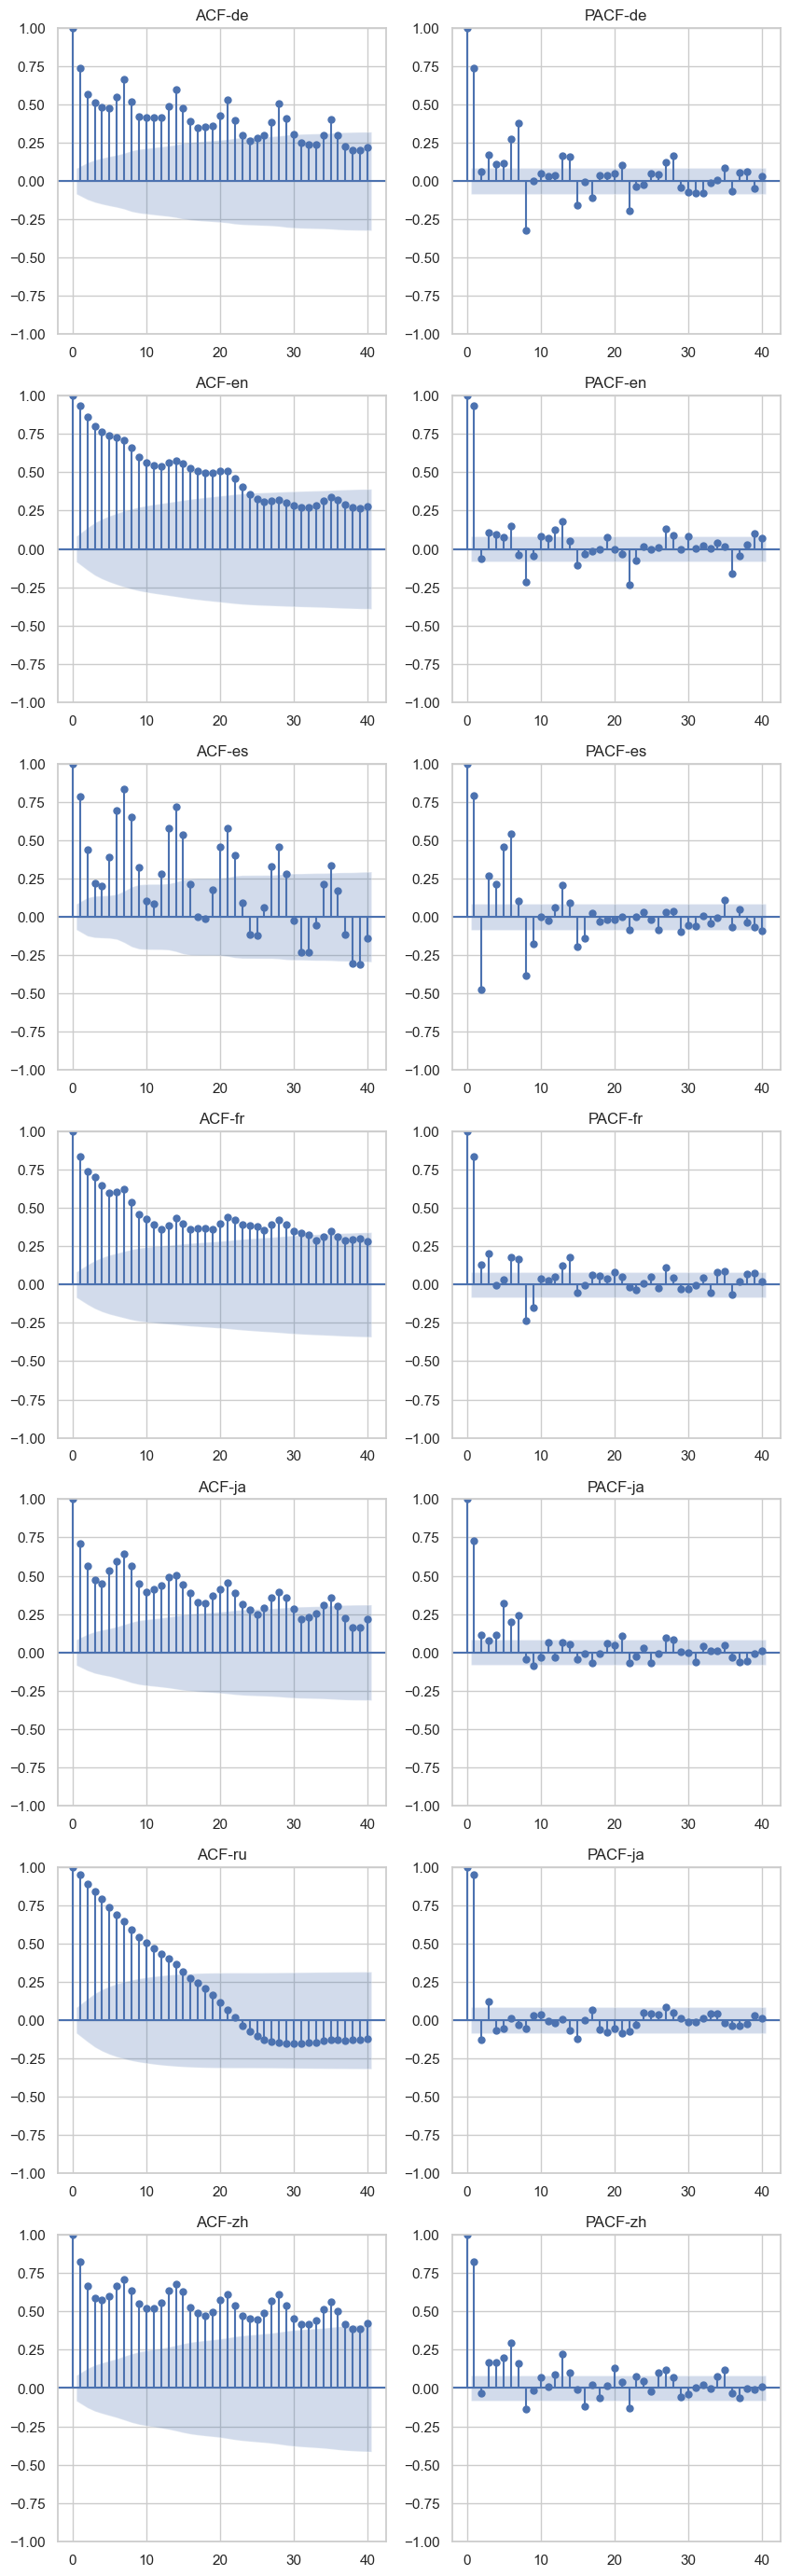

In [102]:
fig, ax = plt.subplots(7,2,figsize=(10,35))
#for i in range(len(langs)):
plot_acf(adease_lang_final[langs[0]], lags = 40, ax=ax[0,0])
ax[0,0].set_title(f"ACF-%s" % str(langs[0]))
plot_pacf(adease_lang_final[langs[0]], lags = 40, method = "ols", ax=ax[0,1])
ax[0,1].set_title(f"PACF-%s" % str(langs[0]))
plot_acf(adease_lang_final[langs[1]], lags = 40, ax=ax[1,0])
ax[1,0].set_title(f"ACF-%s" % str(langs[1]))
plot_pacf(adease_lang_final[langs[1]], lags = 40, method = "ols", ax=ax[1,1])
ax[1,1].set_title(f"PACF-%s" % str(langs[1]))
plot_acf(adease_lang_final[langs[2]], lags = 40, ax=ax[2,0])
ax[2,0].set_title(f"ACF-%s" % str(langs[2]))
plot_pacf(adease_lang_final[langs[2]], lags = 40, method = "ols", ax=ax[2,1])
ax[2,1].set_title(f"PACF-%s" % str(langs[2]))
plot_acf(adease_lang_final[langs[3]], lags = 40, ax=ax[3,0])
ax[3,0].set_title(f"ACF-%s" % str(langs[3]))
plot_pacf(adease_lang_final[langs[3]], lags = 40, method = "ols", ax=ax[3,1])
ax[3,1].set_title(f"PACF-%s" % str(langs[3]))
plot_acf(adease_lang_final[langs[4]], lags = 40, ax=ax[4,0])
ax[4,0].set_title(f"ACF-%s" % str(langs[4]))
plot_pacf(adease_lang_final[langs[4]], lags = 40, method = "ols", ax=ax[4,1])
ax[4,1].set_title(f"PACF-%s" % str(langs[4]))
plot_acf(adease_lang_final[langs[5]], lags = 40, ax=ax[5,0])
ax[5,0].set_title(f"ACF-%s" % str(langs[5]))
plot_pacf(adease_lang_final[langs[5]], lags = 40, method = "ols", ax=ax[5,1])
ax[5,1].set_title(f"PACF-%s" % str(langs[4]))
plot_acf(adease_lang_final[langs[6]], lags = 40, ax=ax[6,0])
ax[6,0].set_title(f"ACF-%s" % str(langs[6]))
plot_pacf(adease_lang_final[langs[6]], lags = 40, method = "ols", ax=ax[6,1])
ax[6,1].set_title(f"PACF-%s" % str(langs[6]))
plt.show()

We can say that Auto correlation values are decaying and PACF has a cut-off at value 1 hence this could depict an AR(1) model.

### Modelling - ARIMA

In [285]:
## create a ARIMA model
from statsmodels.tsa.arima.model import ARIMA
#en_train['en']=en_train['en'].astype('int32')
data = adease_en['en']

In [327]:
data

2015-07-01    3762
2015-07-02    3750
2015-07-03    3561
2015-07-04    3707
2015-07-05    3829
              ... 
2016-12-27    6308
2016-12-28    6103
2016-12-29    6512
2016-12-30    5397
2016-12-31    5276
Name: en, Length: 550, dtype: int32

In [289]:
model_ARIMA=ARIMA(data[:-61],order=(1,1,1))

In [290]:
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                     en   No. Observations:                  489
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3548.194
Date:                Sun, 01 Jan 2023   AIC                           7102.388
Time:                        23:06:11   BIC                           7114.959
Sample:                    07-01-2015   HQIC                          7107.326
                         - 10-31-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3268      0.373     -0.876      0.381      -1.058       0.404
ma.L1          0.4224      0.374      1.130      0.259      -0.310       1.155
sigma2       1.21e+05   3225.348     37.530      0.000    1.15e+05    1.27e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):              2293.27
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               4.14   Skew:                            -0.97
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [291]:
pred=model_Arima_fit.forecast(61,alpha = 0.05)

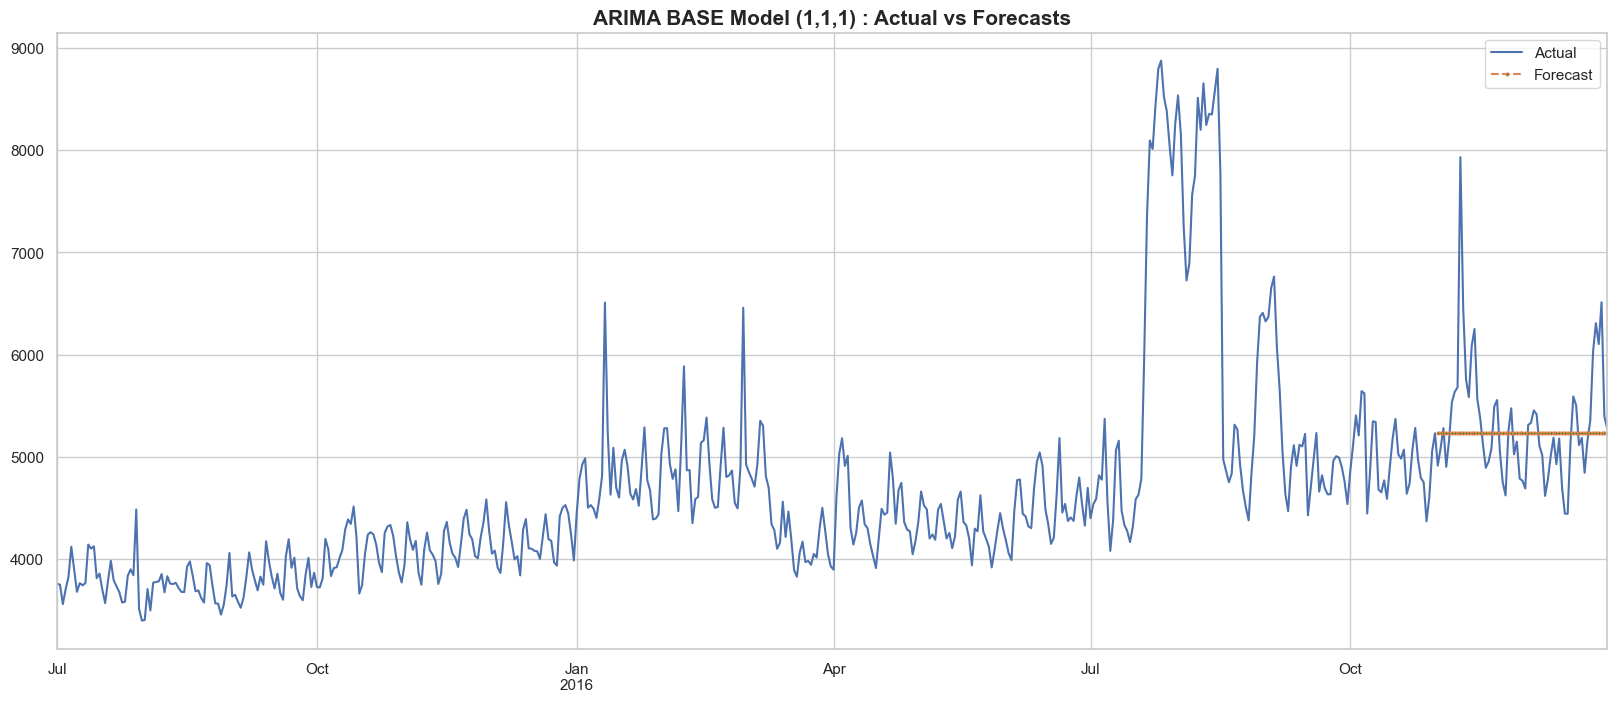

In [294]:
data.index = data.index.astype('datetime64[ns]')
pred.index = pred.index.astype('datetime64[ns]')
plt.figure(figsize = (20,8))
data.plot(label = 'Actual')
pred.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='green', markersize=2)
plt.legend(loc="upper right")
plt.title('ARIMA BASE Model (1,1,1) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()

In [279]:
en_test['ARIMA']=pred

In [295]:
errors = data[-61:].values - pred.values
mape = np.mean(np.abs(errors)/ np.abs( data[-61:].values))
rmse = np.sqrt(np.mean(errors**2))
print('-'*80)
print(f'MAPE of Model : {np.round(mape,5)}')
print('-'*80)
print(f'RMSE of Model : {np.round(rmse,3)}')

--------------------------------------------------------------------------------
MAPE of Model : 0.07187
--------------------------------------------------------------------------------
RMSE of Model : 581.19


### SARIMA

In [328]:
import itertools
import statsmodels.api as sm

SARIMA_params = pd.DataFrame(columns = ['ID','pdq', 'PDQS', 'AIC'])
#set parameter range
p = range(0,3)
q = range(1,3)
d = range(1,3)
s = range(7,8)
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(p, d, q, s))
ID=0
# SARIMA model pipeline
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(en_train['en'],
                                    order=param,
                                    seasonal_order=param_seasonal)
            results = mod.fit(max_iter = 50, method = 'powell')
            list_results = [ID,param, param_seasonal, results.aic]
            SARIMA_params.iloc[ID]=list_results
            ID+=1
        except:
            continue

Optimization terminated successfully.
         Current function value: 7.026442
         Iterations: 3
         Function evaluations: 105
Optimization terminated successfully.
         Current function value: 7.024887
         Iterations: 3
         Function evaluations: 139
Optimization terminated successfully.
         Current function value: 7.287860
         Iterations: 3
         Function evaluations: 120
Optimization terminated successfully.
         Current function value: 6.990577
         Iterations: 4
         Function evaluations: 202
Optimization terminated successfully.
         Current function value: 7.024936
         Iterations: 3
         Function evaluations: 138
Optimization terminated successfully.
         Current function value: 7.017486
         Iterations: 5
         Function evaluations: 300
Optimization terminated successfully.
         Current function value: 7.142997
         Iterations: 3
         Function evaluations: 157
Optimization terminated successful

In [302]:
model1 = sm.tsa.statespace.SARIMAX(data[:-61],
                                            order=(1, 1, 1),
                                            seasonal_order=(1, 1, 1, 7),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

In [303]:
fit = model1.fit()
model1_predict = fit.forecast(61)

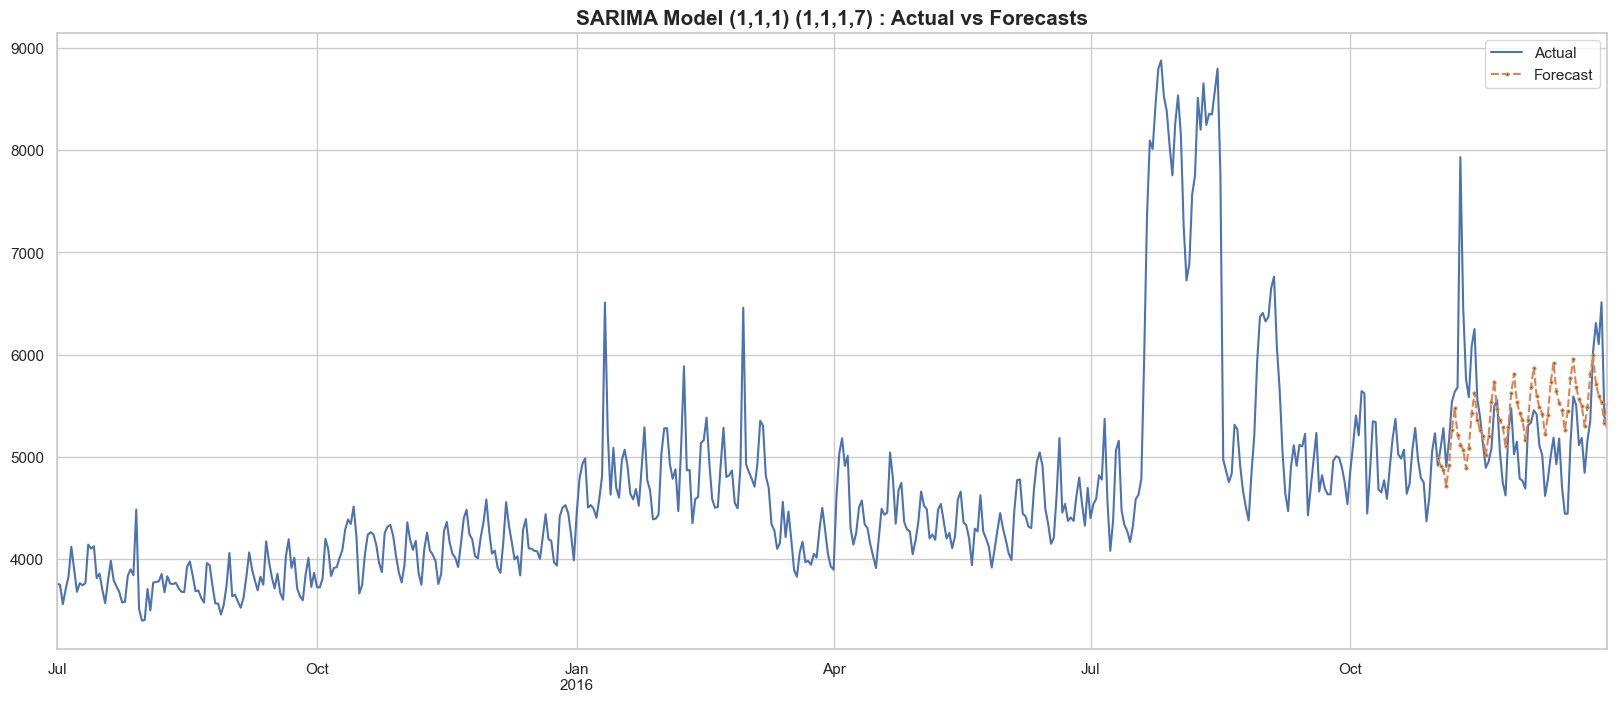

In [325]:
data.index = data.index.astype('datetime64[ns]')
model1_predict.index = model1_predict.index.astype('datetime64[ns]')
plt.figure(figsize = (20,8))
data.plot(label = 'Actual')
model1_predict.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='green', markersize=2)
plt.legend(loc="upper right")
plt.title('SARIMA Model (1,1,1) (1,1,1,7) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()

In [305]:
errors = data[-61:].values - model1_predict.values
mape = np.mean(np.abs(errors)/ np.abs( data[-61:].values))
rmse = np.sqrt(np.mean(errors**2))
print('-'*80)
print(f'MAPE of Model : {np.round(mape,5)}')
print('-'*80)
print(f'RMSE of Model : {np.round(rmse,3)}')

--------------------------------------------------------------------------------
MAPE of Model : 0.0864
--------------------------------------------------------------------------------
RMSE of Model : 619.634


### SARIMAX

In [225]:
exogenous = pd.read_csv('Exog_Campaign_eng')

In [228]:
exogenous

,Exog
0,0
1,0
2,0
3,0
4,0
...,...
484,0
485,0
486,0
487,0


#### Before the Pipeline- Executing a single Model for English 

In [316]:
def sarimax_params(time_series, n, param, d_param, s_param, exog = []):
    iters = 0
    #creating df for storing results summary
    params_data = pd.DataFrame(columns = ['ID','pdq', 'PDQS', 'mape', 'rmse'])
    
    #Creating loop for every paramater to fit SARIMAX model
    for p in param:
        for d in d_param:
            for q in param:
                for P in param:
                    for D in d_param:
                        for Q in param:
                            for s in s_param:
                                #Creating Model
                                model = SARIMAX(time_series[:-n], 
                                                order=(p,d,q), 
                                                seasonal_order=(P, D, Q, s), 
                                                exog = exog[:-n],
                                                initialization='approximate_diffuse')
                                model_fit = model.fit()
                                
                                #Creating forecast from Model
                                model_forecast = model_fit.forecast(n, dynamic = True, exog = pd.DataFrame(exog[-n:]))
                                
                                #Calculating errors for results
                                actuals = time_series.values[-n:]
                                errors = time_series.values[-n:] - model_forecast.values
                                
                                #Calculating MAPE & RMSE
                                mape = np.mean(np.abs(errors)/ np.abs(actuals))
                                rmse = np.sqrt(np.mean(errors**2))
                                mape = np.round(mape,5)
                                rmse = np.round(rmse,3)
                                
                                #Storing the results in param_df
                                iters += 1
                                list_row = [iters, (p,d,q), (P,D,Q,s), mape, rmse]
                                params_data.loc[iters-1] = list_row
                                
                #print statement to check progress of Loop                
                print(f'Possible Combination: {iters} out of { (len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')
                           
    return params_data     

In [317]:
exog = exogenous['Exog'].to_numpy()
n = 61 
param = [0,1,2]
d_param = [0,1]
s_param = [7]
english_params  = sarimax_params(data, n, param, d_param,s_param, exog)

Possible Combination: 18 out of 324 calculated
Possible Combination: 36 out of 324 calculated
Possible Combination: 54 out of 324 calculated
Possible Combination: 72 out of 324 calculated
Possible Combination: 90 out of 324 calculated
Possible Combination: 108 out of 324 calculated
Possible Combination: 126 out of 324 calculated
Possible Combination: 144 out of 324 calculated
Possible Combination: 162 out of 324 calculated
Possible Combination: 180 out of 324 calculated
Possible Combination: 198 out of 324 calculated
Possible Combination: 216 out of 324 calculated
Possible Combination: 234 out of 324 calculated
Possible Combination: 252 out of 324 calculated
Possible Combination: 270 out of 324 calculated
Possible Combination: 288 out of 324 calculated
Possible Combination: 306 out of 324 calculated
Possible Combination: 324 out of 324 calculated


In [320]:
english_params.sort_values(by='mape').head(5)

,ID,pdq,PDQS,mape,rmse
304,305,"(2, 1, 1)","(2, 1, 1, 7)",0.05020,390.760
323,324,"(2, 1, 2)","(2, 1, 2, 7)",0.05240,387.399
145,146,"(1, 0, 2)","(0, 0, 1, 7)",0.05296,387.165
91,92,"(0, 1, 2)","(0, 0, 1, 7)",0.05298,387.794
270,271,"(2, 1, 0)","(0, 0, 0, 7)",0.05300,390.667


### Plotting SARIMAX for English 

In [321]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_sarimax = SARIMAX(data[:-61], 
 order =(2,1,1),
 seasonal_order=(2,1,1,7),
 exog = exogenous[:-61]['Exog'].values,
 initialization='approximate_diffuse')
model_fit = model_sarimax.fit()

In [322]:
sarimax_predict = model_fit.forecast(61, dynamic = True, exog = exogenous[-61:]['Exog'].values)

In [323]:
 #Calculating MAPE & RMSE
errors = data[-61:].values - sarimax_predict.values
mape = np.mean(np.abs(errors)/ np.abs( data[-61:].values))
rmse = np.sqrt(np.mean(errors**2))
print('-'*80)
print(f'MAPE of Model : {np.round(mape,5)}')
print('-'*80)
print(f'RMSE of Model : {np.round(rmse,3)}')

--------------------------------------------------------------------------------
MAPE of Model : 0.0502
--------------------------------------------------------------------------------
RMSE of Model : 390.76


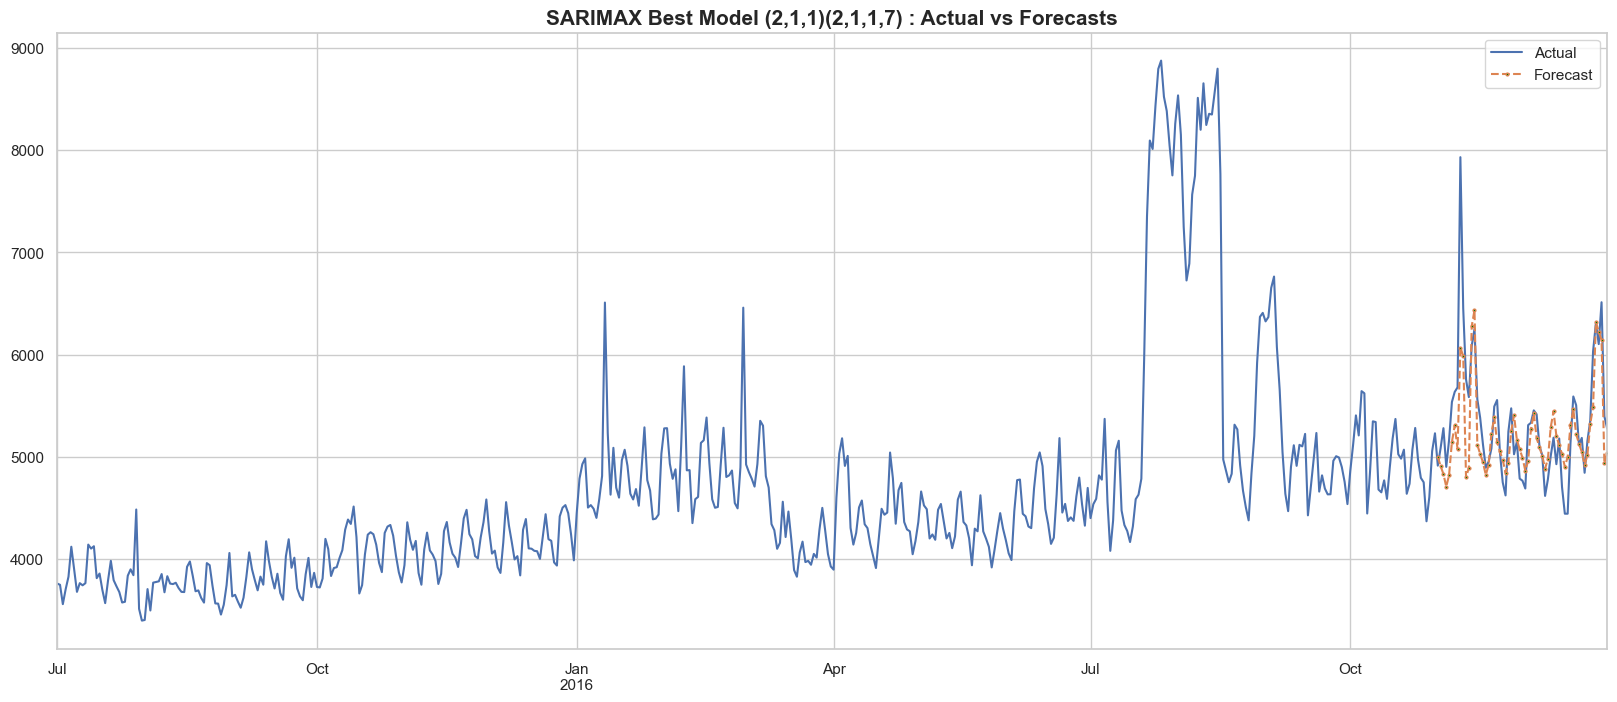

In [326]:
data.index = data.index.astype('datetime64[ns]')
sarimax_predict.index = model1_predict.index.astype('datetime64[ns]')
plt.figure(figsize = (20,8))
data.plot(label = 'Actual')
sarimax_predict.plot(label = 'Forecast', linestyle='dashed', marker='o',markerfacecolor='green', markersize=2)
plt.legend(loc="upper right")
plt.title('SARIMAX Best Model (2,1,1)(2,1,1,7) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
plt.show()

## Model Pipeline - All Languages (Except English- no Exog)

### Finding the best (p,d,q) and (P,D,Q,s) for each of the 6 languages

In [367]:
def sarimax_params_lang(adease_lang_final, n, param, d_param, s_param):
    #creating df for storing results summary
    Lang_params_data = pd.DataFrame(columns = ['Language','p','d','q', 'P','D','Q','S', 'least_mape'])
    lang = ['de','es', 'fr', 'ja', 'ru', 'zh']
    row=0
    for lang in lang:
        print('')
        print('')
        print(f'--------------------------------------------------------------')
        print(f'          Finding best parameters for {lang}                  ')
        print(f'--------------------------------------------------------------')
        iters = 0
        data = adease_lang_final[lang].astype('int32')
        #creating df for storing results summary
        #param_df = pd.DataFrame(columns = ['serial','pdq', 'PDQs', 'mape', 'rmse'])
        best_mape = 100
        
        #Creating loop for every paramater to fit SARIMAX model
        for p in param:
            for d in d_param:
                for q in param:
                    for P in param:
                        for D in d_param:
                            for Q in param:
                                for s in s_param:
                                    #Creating Model
                                    model = SARIMAX(data[:-n], 
                                                    order=(p,d,q), 
                                                    seasonal_order=(P, D, Q, s), 
                                                    initialization='approximate_diffuse')
                                    model_fit = model.fit()

                                    #Creating forecast from Model
                                    model_forecast = model_fit.forecast(n, dynamic = True)

                                    #Calculating errors for results
                                    actuals = data.values[-n:]
                                    errors = data.values[-n:] - model_forecast.values

                                    #Calculating MAPE & RMSE
                                    mape = np.mean(np.abs(errors)/ np.abs(actuals))
                                    
                                    iters += 1

                                    if (mape < best_mape):
                                        best_mape = mape
                                        best_p = p
                                        best_d = d
                                        best_q = q
                                        best_P = P
                                        best_D = D
                                        best_Q = Q
                                        best_s = s
                                    else: pass

                    #print statement to check progress of Loop                
                    print(f'Possible Combination: {iters} out of {(len(param)**4)*len(s_param)*(len(d_param)**2)} calculated')
        
        result_list = [lang, best_p, best_d, best_q, best_P, best_D, best_Q, best_s, best_mape]
        Lang_params_data.loc[len(Lang_params_data)] = result_list     
        row+=1
                           
    return Lang_params_data     

In [368]:
n = 61 
param = [0,1,2]
d_param = [0,1]
s_param = [7]
Lang_best_params  = sarimax_params_lang(adease_lang_final, n, param, d_param,s_param)



--------------------------------------------------------------
          Finding best parameters for de                  
--------------------------------------------------------------
Possible Combination: 18 out of 324 calculated
Possible Combination: 36 out of 324 calculated
Possible Combination: 54 out of 324 calculated
Possible Combination: 72 out of 324 calculated
Possible Combination: 90 out of 324 calculated
Possible Combination: 108 out of 324 calculated
Possible Combination: 126 out of 324 calculated
Possible Combination: 144 out of 324 calculated
Possible Combination: 162 out of 324 calculated
Possible Combination: 180 out of 324 calculated
Possible Combination: 198 out of 324 calculated
Possible Combination: 216 out of 324 calculated
Possible Combination: 234 out of 324 calculated
Possible Combination: 252 out of 324 calculated
Possible Combination: 270 out of 324 calculated
Possible Combination: 288 out of 324 calculated
Possible Combination: 306 out of 324 calculated
Po

In [369]:
Lang_best_params

,Language,p,d,q,P,D,Q,S,least_mape
0,de,1,0,0,2,0,1,7,0.067352
1,es,1,1,1,1,0,1,7,0.102249
2,fr,2,0,1,1,1,2,7,0.061792
3,ja,0,1,1,2,1,2,7,0.058485
4,ru,2,0,2,1,0,2,7,0.052409
5,zh,0,0,1,1,0,0,7,0.038209


We have good predictablity with CHinese (zh) , ENglish (en) as they have less mape

In [376]:
#Function to plot SARIMAX model for each Language

def plot_best_SARIMAX_model(adease_lang_final, n, Lang_best_params):
    lang = ['de','es', 'fr', 'ja', 'ru', 'zh']
    for lang in lang:
        #fetching respective best parameters for that language
        p = Lang_best_params.loc[Lang_best_params['Language'] == lang, ['p']].values[0][0]
        d = Lang_best_params.loc[Lang_best_params['Language'] == lang, ['d']].values[0][0]
        q = Lang_best_params.loc[Lang_best_params['Language'] == lang, ['q']].values[0][0]
        P = Lang_best_params.loc[Lang_best_params['Language'] == lang, ['P']].values[0][0]
        D = Lang_best_params.loc[Lang_best_params['Language'] == lang, ['D']].values[0][0]
        Q = Lang_best_params.loc[Lang_best_params['Language'] == lang, ['Q']].values[0][0]
        s = Lang_best_params.loc[Lang_best_params['Language'] == lang, ['S']].values[0][0]
        
        #Creating language time-series
        data = adease_lang_final[lang].astype('int32')
        
        #Creating SARIMAX Model with order(p,d,q) & seasonal_order=(P, D, Q, s) 
        model = SARIMAX(data[:-n], 
                        order =(p,d,q), 
                        seasonal_order=(P, D, Q, s),
                        initialization='approximate_diffuse')
        model_fit = model.fit()
        
        #Creating forecast for last n-values
        model_forecast = model_fit.forecast(n, dynamic = True)
        
        #Calculating MAPE & RMSE
        actuals = data.values[-n:]
        errors = data.values[-n:] - model_forecast.values

        mape = np.mean(np.abs(errors)/ np.abs(actuals))
        rmse = np.sqrt(np.mean(errors**2))
        
        print('')
        print('')
        print(f'-----------------------------------------------------------------------------------------')
        print(f'        SARIMAX model for {lang} Time Series                                             ')
        print(f'        Parameters of Model : ({p},{d},{q}) ({P},{D},{Q},{s})                            ')
        print(f'        MAPE of Model       : {np.round(mape,5)}                                         ')
        print(f'        RMSE of Model       : {np.round(rmse,3)}                                         ')
        print(f'-----------------------------------------------------------------------------------------')
        
        #plotting Actual & Forecasted values
        data.index = data.index.astype('datetime64[ns]')
        model_forecast.index = model_forecast.index.astype('datetime64[ns]')
        plt.figure(figsize = (20,8))
        data[-61:].plot(label = 'Actual')
        model_forecast[-61:].plot(label = 'Forecast', color = 'red', 
                                  linestyle='dashed', marker='o',markerfacecolor='green', markersize=5)
        plt.legend(loc="upper right")
        plt.title(f'SARIMAX Model ({p},{d},{q}) ({P},{D},{Q},{s}) : Actual vs Forecasts', fontsize = 15, fontweight = 'bold')
        plt.show()
    
    return 0



-----------------------------------------------------------------------------------------
        SARIMAX model for de Time Series                                             
        Parameters of Model : (1,0,0) (2,0,1,7)                            
        MAPE of Model       : 0.06735                                         
        RMSE of Model       : 103.761                                         
-----------------------------------------------------------------------------------------


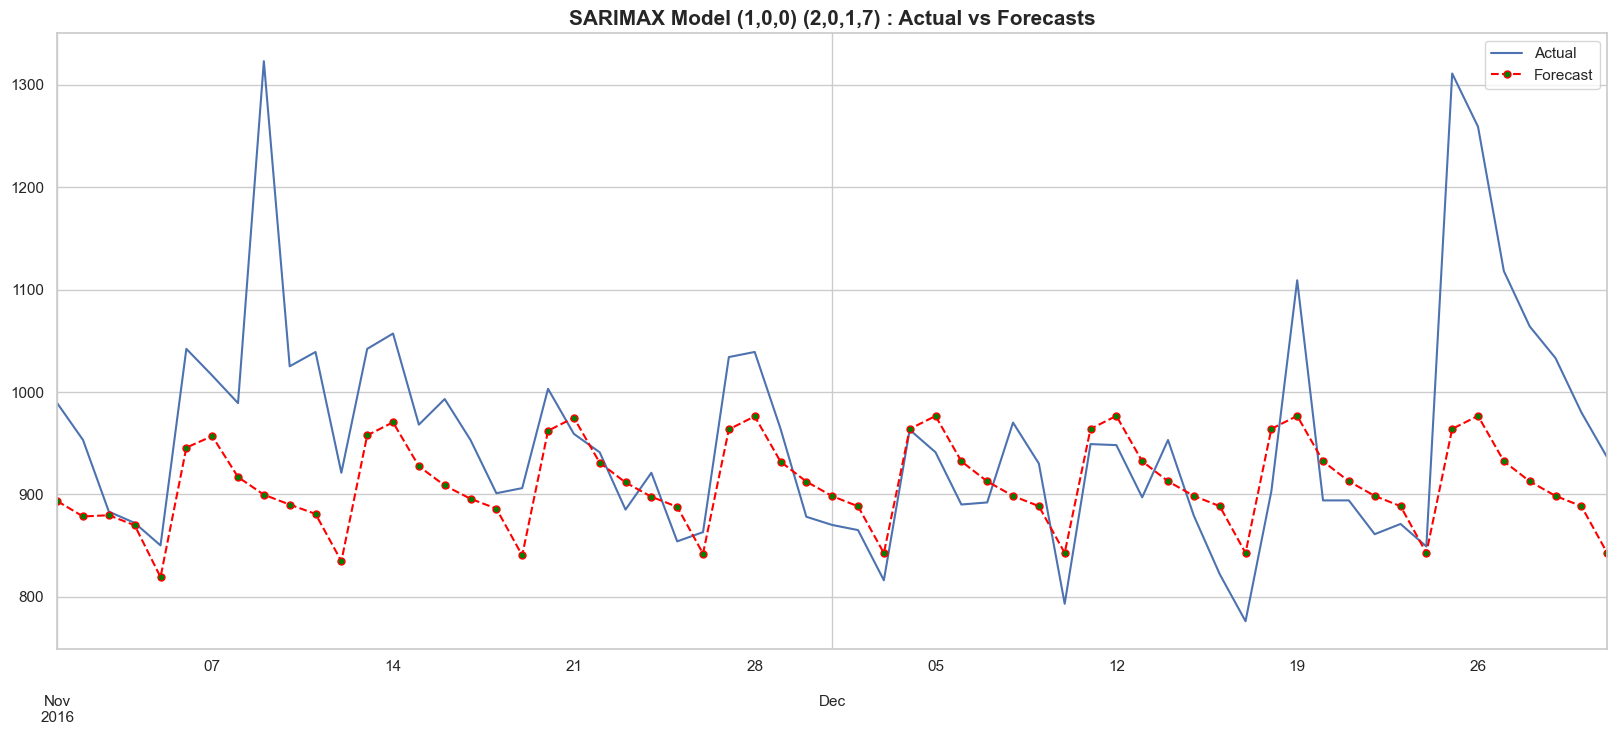



-----------------------------------------------------------------------------------------
        SARIMAX model for es Time Series                                             
        Parameters of Model : (1,1,1) (1,0,1,7)                            
        MAPE of Model       : 0.10225                                         
        RMSE of Model       : 178.565                                         
-----------------------------------------------------------------------------------------


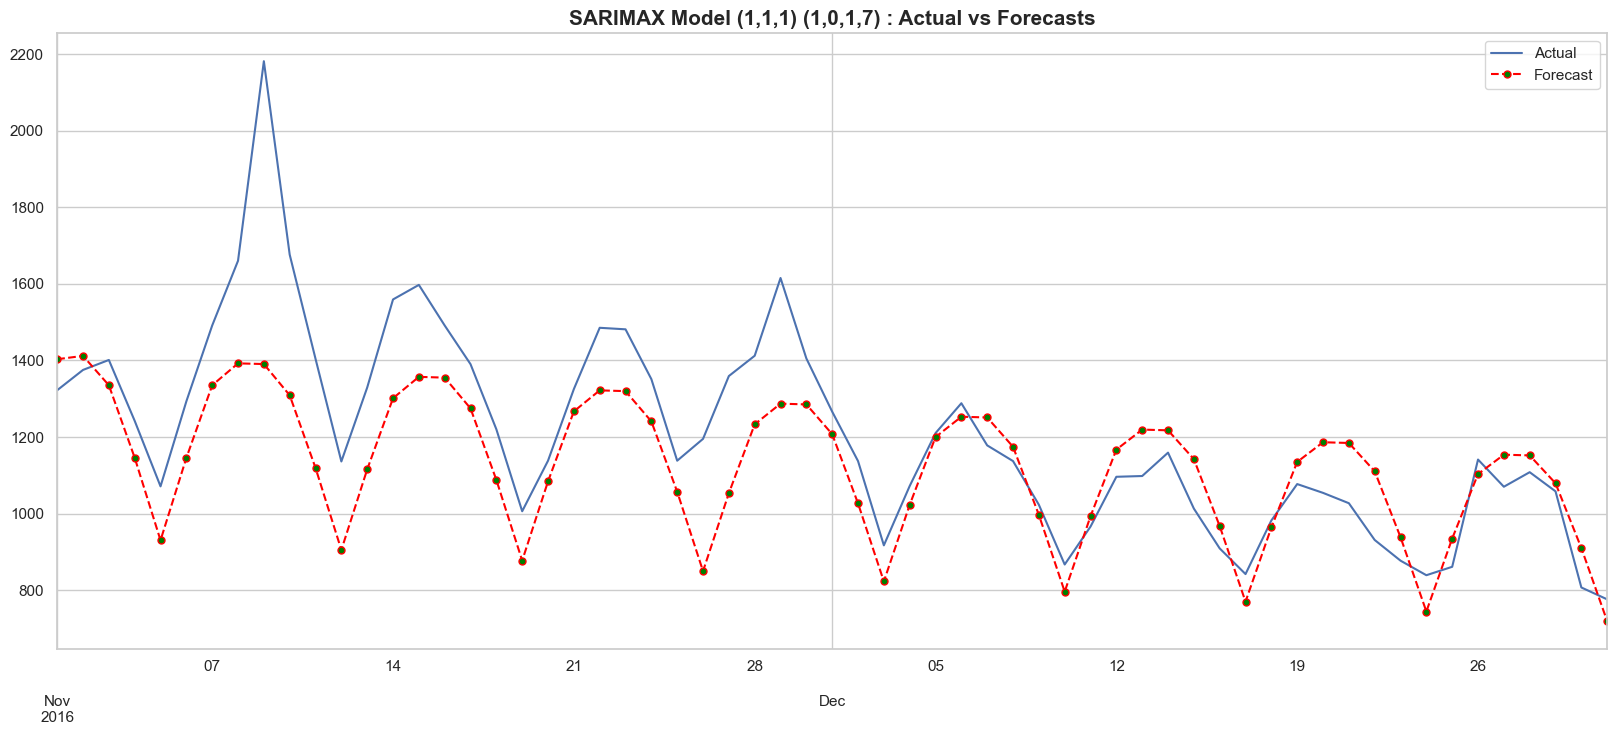



-----------------------------------------------------------------------------------------
        SARIMAX model for fr Time Series                                             
        Parameters of Model : (2,0,1) (1,1,2,7)                            
        MAPE of Model       : 0.06179                                         
        RMSE of Model       : 68.789                                         
-----------------------------------------------------------------------------------------


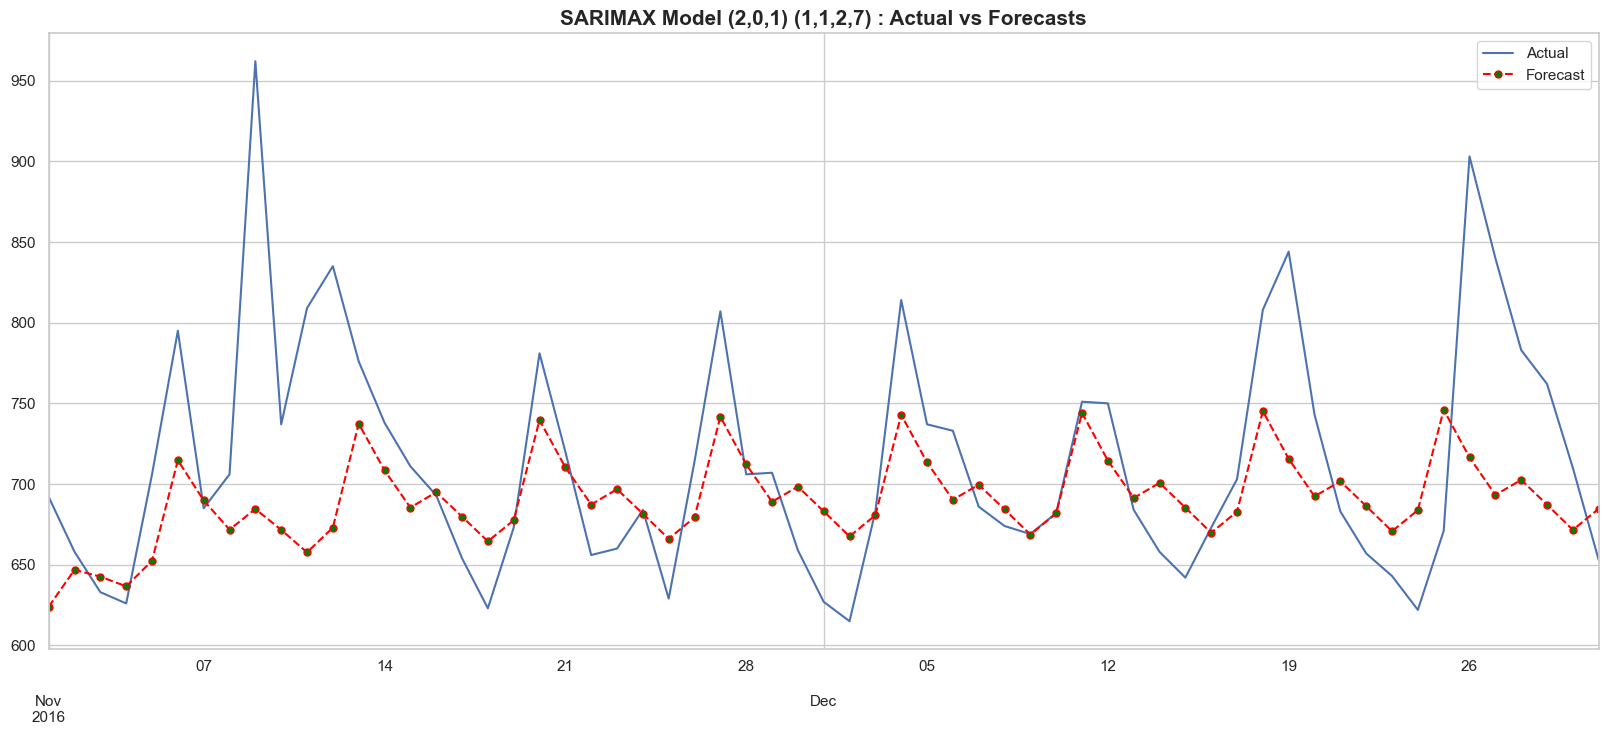



-----------------------------------------------------------------------------------------
        SARIMAX model for ja Time Series                                             
        Parameters of Model : (0,1,1) (2,1,2,7)                            
        MAPE of Model       : 0.05849                                         
        RMSE of Model       : 82.446                                         
-----------------------------------------------------------------------------------------


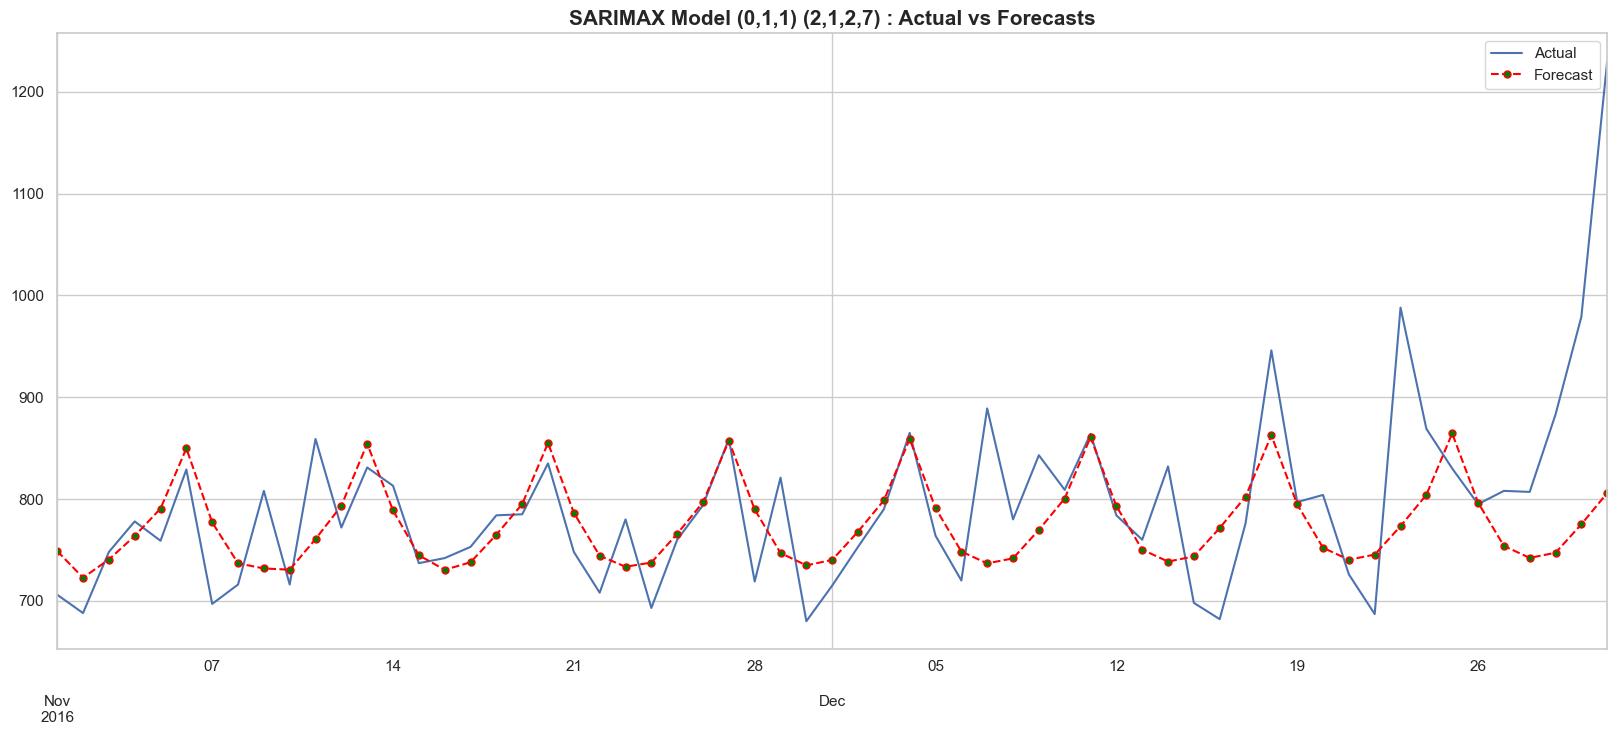



-----------------------------------------------------------------------------------------
        SARIMAX model for ru Time Series                                             
        Parameters of Model : (2,0,2) (1,0,2,7)                            
        MAPE of Model       : 0.05241                                         
        RMSE of Model       : 97.577                                         
-----------------------------------------------------------------------------------------


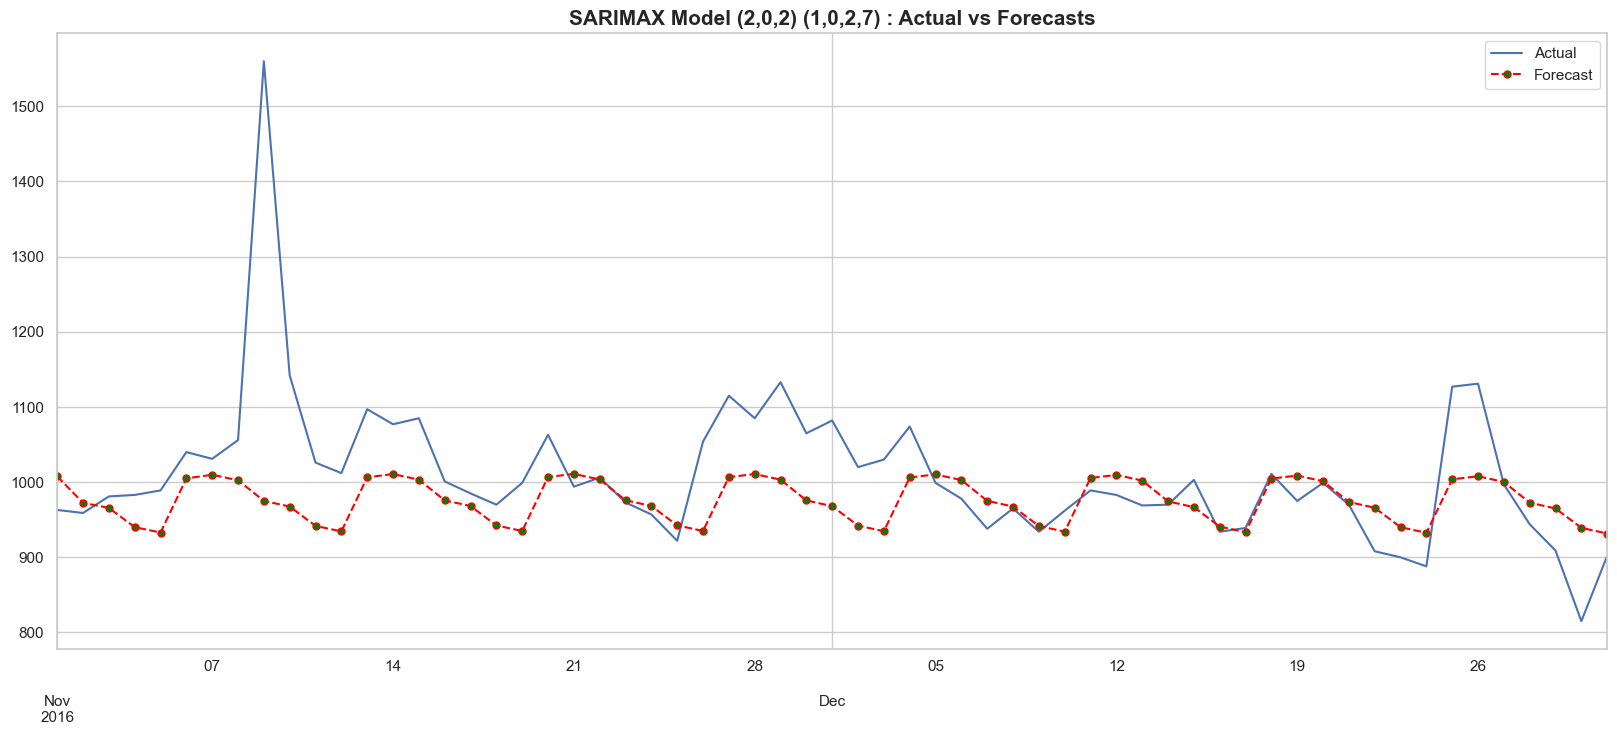



-----------------------------------------------------------------------------------------
        SARIMAX model for zh Time Series                                             
        Parameters of Model : (0,0,1) (1,0,0,7)                            
        MAPE of Model       : 0.03821                                         
        RMSE of Model       : 27.432                                         
-----------------------------------------------------------------------------------------


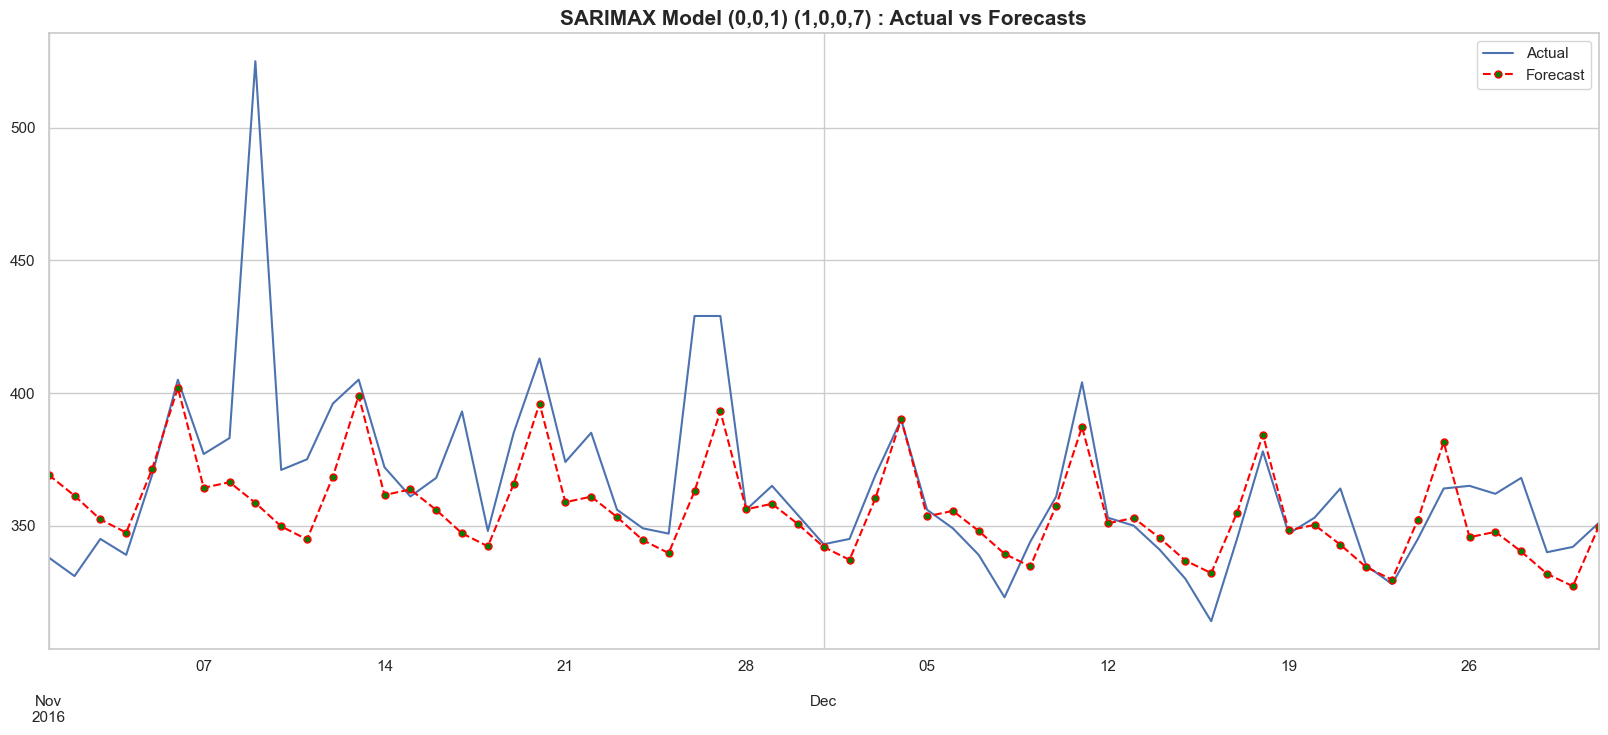

0

In [377]:
#Plotting SARIMAX model for each Language Time Series
languages = ['de','es', 'fr', 'ja', 'ru', 'zh']
n = 61 
plot_best_SARIMAX_model(adease_lang_final, n, Lang_best_params)

### Facebook Prophet -- Not covered for us just giving it a try

In [383]:
from fbprophet import Prophet
###Unable to install after multiple attempts

ModuleNotFoundError: No module named 'fbprophet'

### Questionnaire:

**1. Defining the problem statements and where can this and modifications of this be used?**

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost. AdEase is an ad infrastructure to help businesses promote themselves easily, effectively, and economically. The interplay of 3 AI modules - Design, Dispense, and Decipher, come together to make it this an end-to-end 3 step process digital advertising solution for all.

You are working in the Data Science team of Ad ease trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that you can predict and optimize the ad placement for your clients. You are provided with the data of 145k wikipedia pages and daily view count for each of them. Your clients belong to different regions and need data on how their ads will perform on pages in different languages.

This kind of comparative Time series forescasting can also be used to compare sales of different product portfolios, 
comparing different segments of manufacturing products to access their efficacy.

**2. Write 3 inferences you made from the data visualizations**

1. ENglish language has comparatively higher average views per day 
2. All-agents is high ocuring Access-Origin and All-Acess is high occuring Access-Type
3. There were close to 18K records which had no language as part of the page code
4. There was a strong weekly seasonality observed and exogenous variables had an impact too

**3.What does the decomposition of series do?**

<Figure size 2000x700 with 0 Axes>

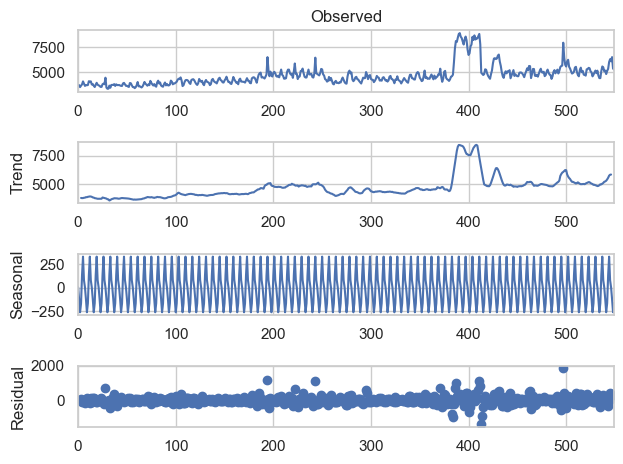

<Figure size 2000x700 with 0 Axes>

In [379]:
fig = result.plot()
plt.figure(figsize=(20, 7))

Decomposing will help and understand the presence of trend and seasonality in the Time-Series along with Residuals/Errors

There are two types of decomposition : Additive & Multiplicative.
we have used Additive Model for deconstructing the time series as there was no multiplicative behaviour visible.
-->additive means individual components (trend, seasonality, and residual) are added together as shown in equation below:<br>
𝑦𝑡  =  𝑇𝑡  +  𝑆𝑡  +  𝑅𝑡 <br>
where<br>

𝑦𝑡  = actual value in time series<br>
𝑇𝑡  = trend in time series<br>
𝑆𝑡  = seasonality in time series<br>
𝑅𝑡  = residuals of time series<br>

**4.What level of differencing gave you a stationary series?**

I did first order differencing and series became stationary <br>
Actual series had a p-value of 0.15<br>
where as first order differencing had p-value in order 1e-9 <br>

ALso single order differencing seasoanlity based (shift(7)) also gave a stationary series

**5.Difference between arima, sarima & sarimax.**

ARIMA

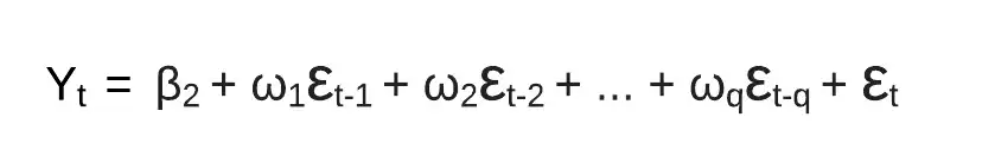

ARIMA Formula — By Author
The ARIMA model is an ARMA model yet with a preprocessing step included in the model that we represent using I(d). I(d) is the difference order, which is the number of transformations needed to make the data stationary. So, an ARIMA model is simply an ARMA model on the differenced time series.

Enter SARIMA (Seasonal ARIMA). This model is very similar to the ARIMA model, except that there is an additional set of autoregressive and moving average components.The additional lags are offset by the frequency of seasonality (ex. 12 — monthly, 24 — hourly).

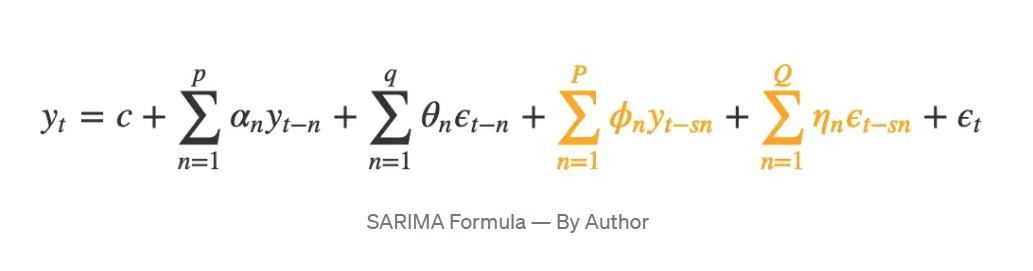

SARIMA models allow for differencing data by seasonal frequency, yet also by non-seasonal differencing. Knowing which parameters are best can be made easier through automatic parameter search frameworks such as pmdarina.

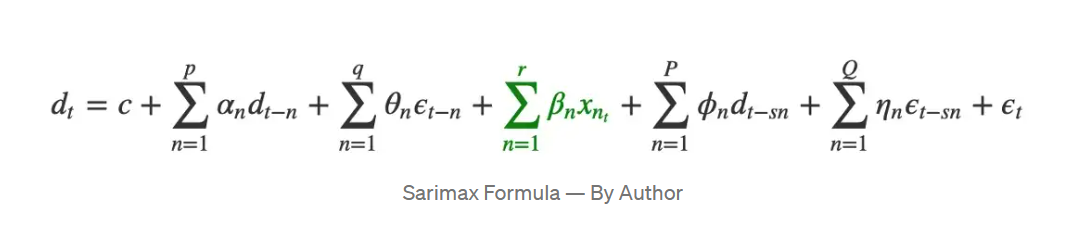

Above is the the of the SARIMAX model. This model takes into account exogenous variables, or in other words, use external data in our forecast. Some real-world examples of exogenous variables include gold price, oil price, outdoor temperature, exchange rate.

It is interesting to think that all exogenous factors are still technically indirectly modeled in the historical model forecast. That being said, if we include external data, the model will respond much quicker to its affect than if we rely on the influence of lagging terms.

**6.Compare the number of views in different languages**

Text(0.5, 1.0, 'Mean views per Language')

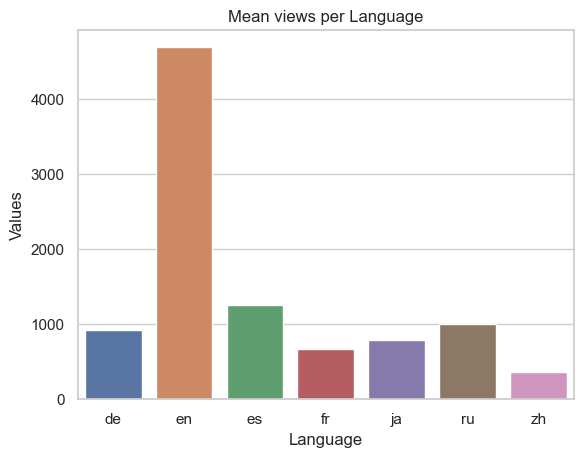

In [382]:
sns.barplot(data=Avg_view,x='Language',y='Values')
plt.title('Mean views per Language')

These are the average views per Language, where clearly ENglish is way above other languages followed by Spanish and Russian

**7.What other methods other than grid search would be suitable to get the model for all languages?**

Manual Grid search which would be multiple loops for each of the parameters,
or we can do by checking ACF,PACF lags and differencing values to get the seasonality and get the params p,d,q.